In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from geopy.distance import geodesic
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
# Membaca dataset ke dalam DataFrame
df = pd.read_csv("Transjakarta.csv")


In [ ]:
# Menampilkan 5 baris pertama untuk memahami struktur data
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [ ]:
# Melihat informasi data seperti tipe data dan jumlah nilai yang hilang
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Insight:

- Dataset berhasil diimpor ke dalam DataFrame df

- Kita dapat melihat nama kolom, beberapa data awal, dan format dataset.

## Data Understanding

### Memahami Struktur Dataset

Periksa dimensi dataset (jumlah baris dan kolom), nama kolom, dan tipe data.

In [ ]:
# Dimensi dataset
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Jumlah baris: 37900, Jumlah kolom: 22


In [ ]:
# Nama kolom dan tipe data
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   365

### Melihat Nilai Unik di Kolom Kategorikal

- Untuk mengetahui variasi data dalam kolom kategorikal seperti payCardBank, payCardSex, dll.

In [ ]:
for col in ['payCardBank', 'payCardSex', 'corridorName']:
    print(f"Kolom {col} memiliki {df[col].nunique()} nilai unik.")
    print(f"Nilai unik: {df[col].unique()}")


Kolom payCardBank memiliki 6 nilai unik.
Nilai unik: ['emoney' 'dki' 'flazz' 'online' 'brizzi' 'bni']
Kolom payCardSex memiliki 2 nilai unik.
Nilai unik: ['M' 'F']
Kolom corridorName memiliki 216 nilai unik.
Nilai unik: ['Matraman Baru - Ancol' 'Stasiun Tebet - Karet via Patra Kuningan'
 'Pantai Maju - Kota' 'Pulo Gebang - Pulo Gadung 2 via PIK'
 'Tanjung Priok - Pluit' 'Cibubur - Balai Kota' 'Kalibata - Kuningan' nan
 'Bekasi Barat - Kuningan' 'Rempoa - Blok M'
 'Kampung Melayu - Tanah Abang via Cikini' 'BKN - Blok M'
 'PGC 2 - Grogol 2' 'Pulo Gadung 2 - Tosari' 'Pasar Minggu - Jagakarsa'
 'Ciputat - Kampung Rambutan' 'Ciledug - Tendean'
 'Kebayoran Lama - Jelambar' 'Pinang Ranti - Pluit'
 'Terminal Tanjung Priok - Ancol Barat' 'Poris Plawad - Bundaran Senayan'
 'Cililitan - Condet' 'Ragunan - Gelora Bung Karno'
 'Kampung Melayu - Pulo Gebang via BKT' 'Kampung Melayu - Duren Sawit'
 'Pulo Gebang - Matraman' 'Pesanggrahan - Blok M'
 'Rusun Flamboyan - Cengkareng' 'Blok M - Kota'
 'Kamp

In [ ]:
# Statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
print(df.describe())

Statistik Deskriptif:
          payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04      37900.000000  37900.000000   37900.000000   
mean   4.250060e+17       1990.089314      0.500633      -6.214838   
std    1.321699e+18         13.051482      0.500006       0.057911   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800442e+14       1982.000000      0.000000      -6.245863   
50%    3.507947e+15       1990.000000      1.000000      -6.214587   
75%    4.699023e+15       2001.000000      1.000000      -6.175528   
max    4.997694e+18       2012.000000      1.000000      -6.089429   

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count   37900.000000  37900.000000    36556.000000    36556.000000   
mean      106.841554     13.572480       -6.214651      106.841233   
std         0.060369     12.237623        0.059022        0.060999   
min       106.614730      0.000000       -6.394973      106.614730 

Insight:

- Dataset memiliki 37900 baris dan 22 kolom
- Informasi tipe data menunjukkan apakah ada kolom yang perlu diubah tipenya
- Statistik deskriptif memberikan gambaran seperti rata-rata, nilai minimum, dan maksimum untuk kolom numerik

### Mengecek Nilai Kosong (Missing Values)

In [ ]:
# Mengecek jumlah nilai kosong di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah Nilai Kosong:")
print(missing_values)

Jumlah Nilai Kosong:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


Beberapa kolom memiliki nilai missing (misalnya, corridorID, corridorName, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount)

In [ ]:
# Persentase nilai kosong
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase Nilai Kosong:")
print(missing_percentage)


Persentase Nilai Kosong:
transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64


Visualisasi Nilai Kosong

<Axes: >

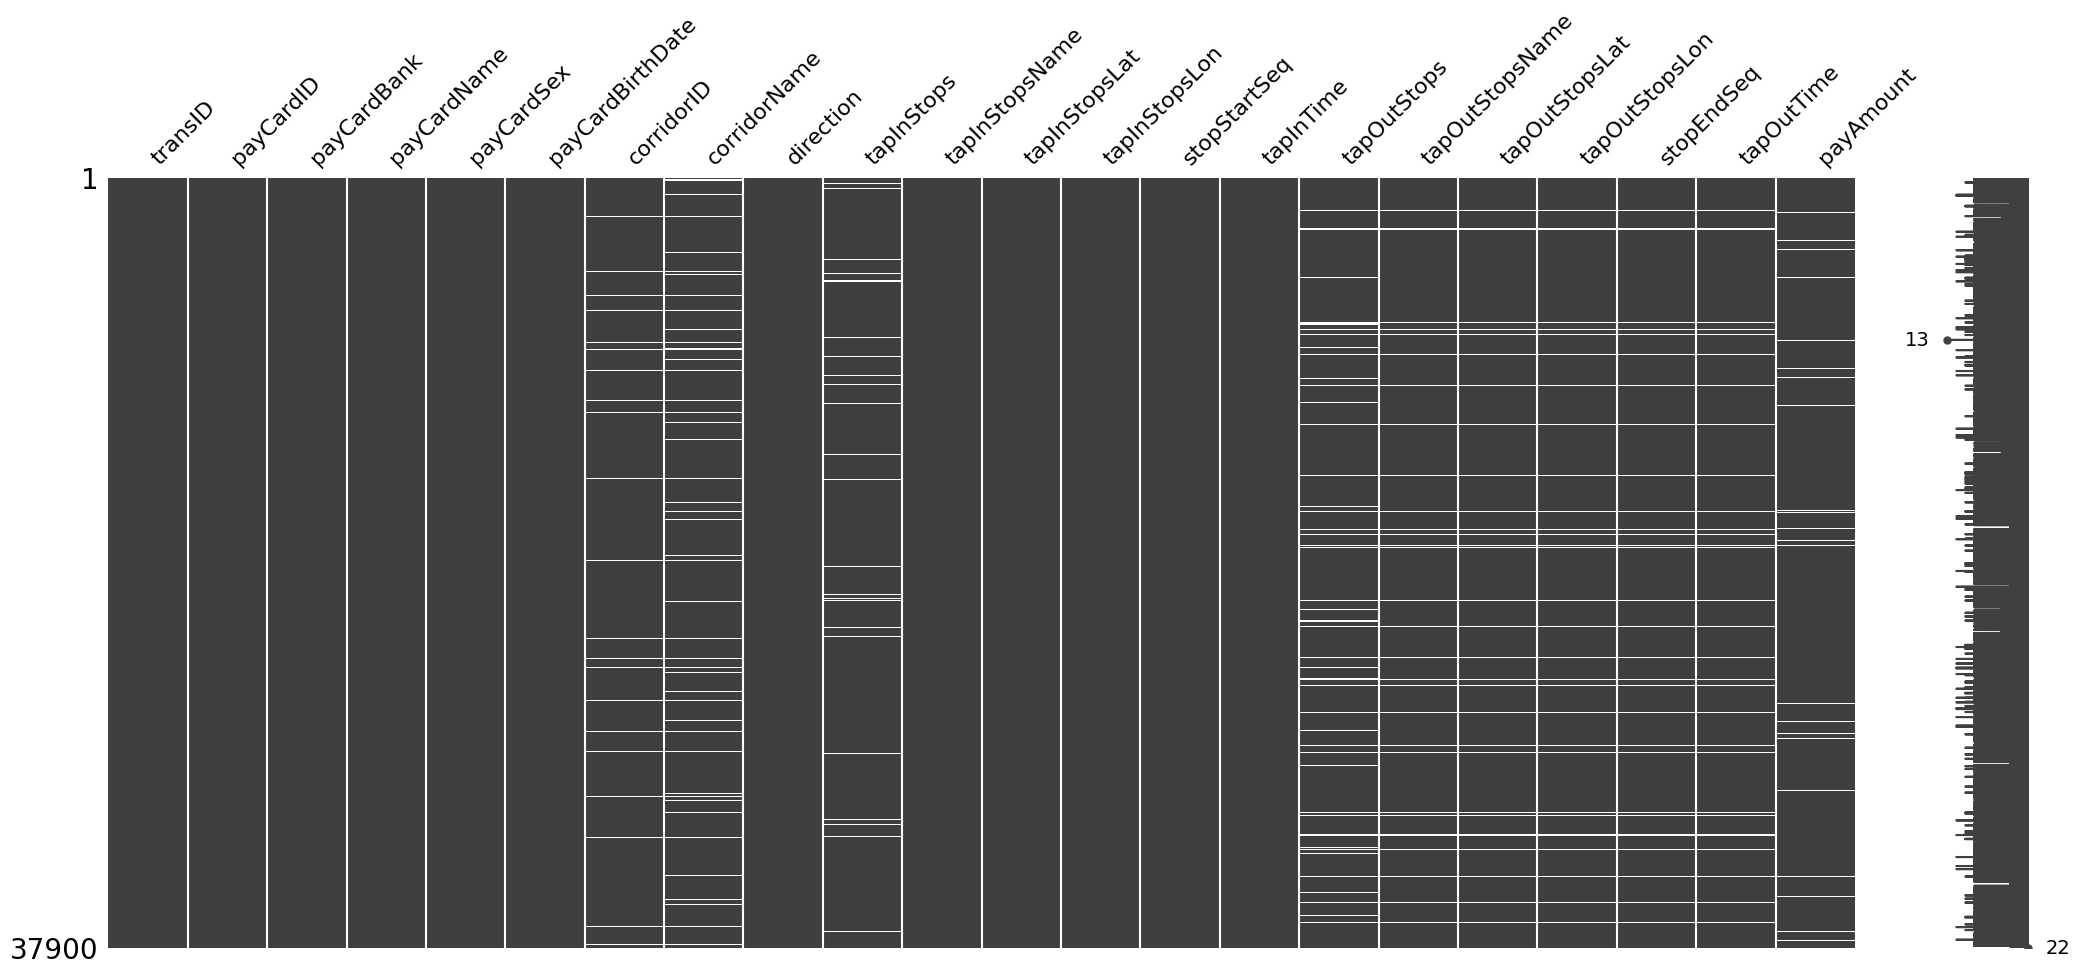

In [ ]:
import missingno as msno

msno.matrix(df)

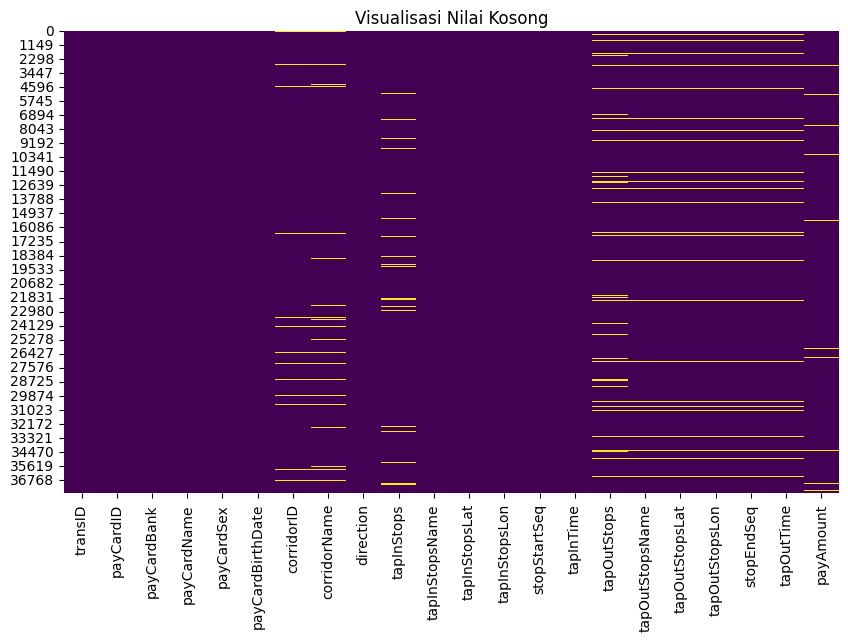

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Nilai Kosong')
plt.show()


Statistik Deskriptif untuk Kolom Numerik

- Melihat statistik dasar seperti rata-rata, median, minimum, maksimum, dll.

In [ ]:
# Memeriksa statistik deskriptif untuk kolom numerik
print(df.describe())

          payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04      37900.000000  37900.000000   37900.000000   
mean   4.250060e+17       1990.089314      0.500633      -6.214838   
std    1.321699e+18         13.051482      0.500006       0.057911   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800442e+14       1982.000000      0.000000      -6.245863   
50%    3.507947e+15       1990.000000      1.000000      -6.214587   
75%    4.699023e+15       2001.000000      1.000000      -6.175528   
max    4.997694e+18       2012.000000      1.000000      -6.089429   

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count   37900.000000  37900.000000    36556.000000    36556.000000   
mean      106.841554     13.572480       -6.214651      106.841233   
std         0.060369     12.237623        0.059022        0.060999   
min       106.614730      0.000000       -6.394973      106.614730   
25%       106.80347

Melihat Statistik Deskriptif untuk Kolom Kategorikal

- Untuk mengetahui distribusi data kategorikal.

In [ ]:
for col in ['payCardBank', 'payCardSex', 'corridorName']:
    print(df[col].value_counts())


payCardBank
dki       18743
emoney     6866
brizzi     3531
flazz      3234
online     2869
bni        2657
Name: count, dtype: int64
payCardSex
F    20157
M    17743
Name: count, dtype: int64
corridorName
Cibubur - Balai Kota                              391
Ciputat - CSW                                     383
Pulo Gadung - Monas                               343
Harmoni - Jakarta International Stadium           338
Kebayoran Lama - Tanah Abang                      333
                                                 ... 
Senen - Tanah Abang                                41
Gondangdia - Balai Kota                            40
Term. Pulo Gadung - Lampiri                        31
Tanah Abang - Kebayoran Lama via Pos Pengumben     23
Kampung Rambutan - Blok M                          17
Name: count, Length: 216, dtype: int64


### Distribusi Data

Periksa Distribusi Data di Semua Kolom Numerik
- Distribusi data penting untuk memahami apakah data berdistribusi normal, skewed, atau memiliki pola tertentu.

Visualisasi Distribusi

In [ ]:
# Memilih kolom dengan tipe data numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Periksa apakah ada kolom numerik
if len(numeric_columns) == 0:
    print("Dataset tidak memiliki kolom numerik.")
else:
    print(f"Kolom numerik yang terdeteksi: {list(numeric_columns)}")




Kolom numerik yang terdeteksi: ['payCardID', 'payCardBirthDate', 'direction', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'payAmount']


Uji Normalitas untuk Semua Kolom Numerik:

- Gunakan uji statistik seperti Shapiro-Wilk untuk memeriksa apakah data berdistribusi normal.

In [ ]:
from scipy.stats import shapiro

for col in numeric_columns:
    stat, p = shapiro(df[col].dropna())
    print(f"Kolom: {col}")
    print(f"Statistik Shapiro-Wilk: {stat}, p-value: {p}")
    if p > 0.05:
        print("Distribusi normal")
    else:
        print("Distribusi tidak normal")
    print("-" * 30)


Kolom: payCardID
Statistik Shapiro-Wilk: 0.33715696205257983, p-value: 1.597670391206259e-142
Distribusi tidak normal
------------------------------
Kolom: payCardBirthDate
Statistik Shapiro-Wilk: 0.9766101788345805, p-value: 4.7071265116754095e-59
Distribusi tidak normal
------------------------------
Kolom: direction
Statistik Shapiro-Wilk: 0.6366229025305512, p-value: 8.461366901953266e-125
Distribusi tidak normal
------------------------------
Kolom: tapInStopsLat
Statistik Shapiro-Wilk: 0.9883934914511087, p-value: 3.0821874082189605e-46
Distribusi tidak normal
------------------------------
Kolom: tapInStopsLon
Statistik Shapiro-Wilk: 0.9919506712312688, p-value: 3.465494051865692e-40
Distribusi tidak normal
------------------------------
Kolom: stopStartSeq
Statistik Shapiro-Wilk: 0.884142839738572, p-value: 2.1939668074172995e-94
Distribusi tidak normal
------------------------------
Kolom: tapOutStopsLat
Statistik Shapiro-Wilk: 0.9877865117241683, p-value: 1.4394303202651708e-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37900.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36556.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36893.
  res = hypotest_fun_out(*samples, **kwds)


Histogram untuk Kolom Numerik

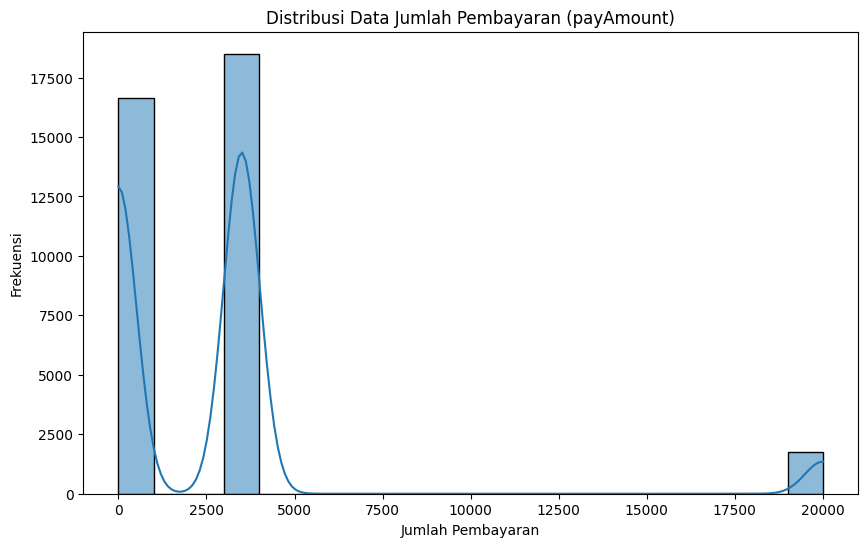

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['payAmount'], bins=20, kde=True)
plt.title('Distribusi Data Jumlah Pembayaran (payAmount)')
plt.xlabel('Jumlah Pembayaran')
plt.ylabel('Frekuensi')
plt.show()


Memeriksa Kolom Kategorikal

- Untuk kolom kategorikal, kita memeriksa distribusi data dan kemungkinan kategori yang tidak valid.

Boxplot untuk Deteksi Outliers

- Melihat persebaran data dan mengidentifikasi outliers.

### Outliers

Periksa Outliers di Semua Kolom Numerik

- Outliers dapat memengaruhi analisis statistik dan model prediktif secara signifikan. Oleh karena itu, kita harus mengecek outliers di semua kolom numerik.

In [ ]:
#Periksa outliers di setiap kolom numerik menggunakan metode IQR (Interquartile Range).##
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Kolom: {col}")
    print(f"Jumlah Outliers: {len(outliers)}")
    print("-" * 30)



Kolom: payCardID
Jumlah Outliers: 3531
------------------------------
Kolom: payCardBirthDate
Jumlah Outliers: 340
------------------------------
Kolom: direction
Jumlah Outliers: 0
------------------------------
Kolom: tapInStopsLat
Jumlah Outliers: 411
------------------------------
Kolom: tapInStopsLon
Jumlah Outliers: 558
------------------------------
Kolom: stopStartSeq
Jumlah Outliers: 1543
------------------------------
Kolom: tapOutStopsLat
Jumlah Outliers: 359
------------------------------
Kolom: tapOutStopsLon
Jumlah Outliers: 449
------------------------------
Kolom: stopEndSeq
Jumlah Outliers: 583
------------------------------
Kolom: payAmount
Jumlah Outliers: 1742
------------------------------


Visualisasi Outliers Tiap Kolom

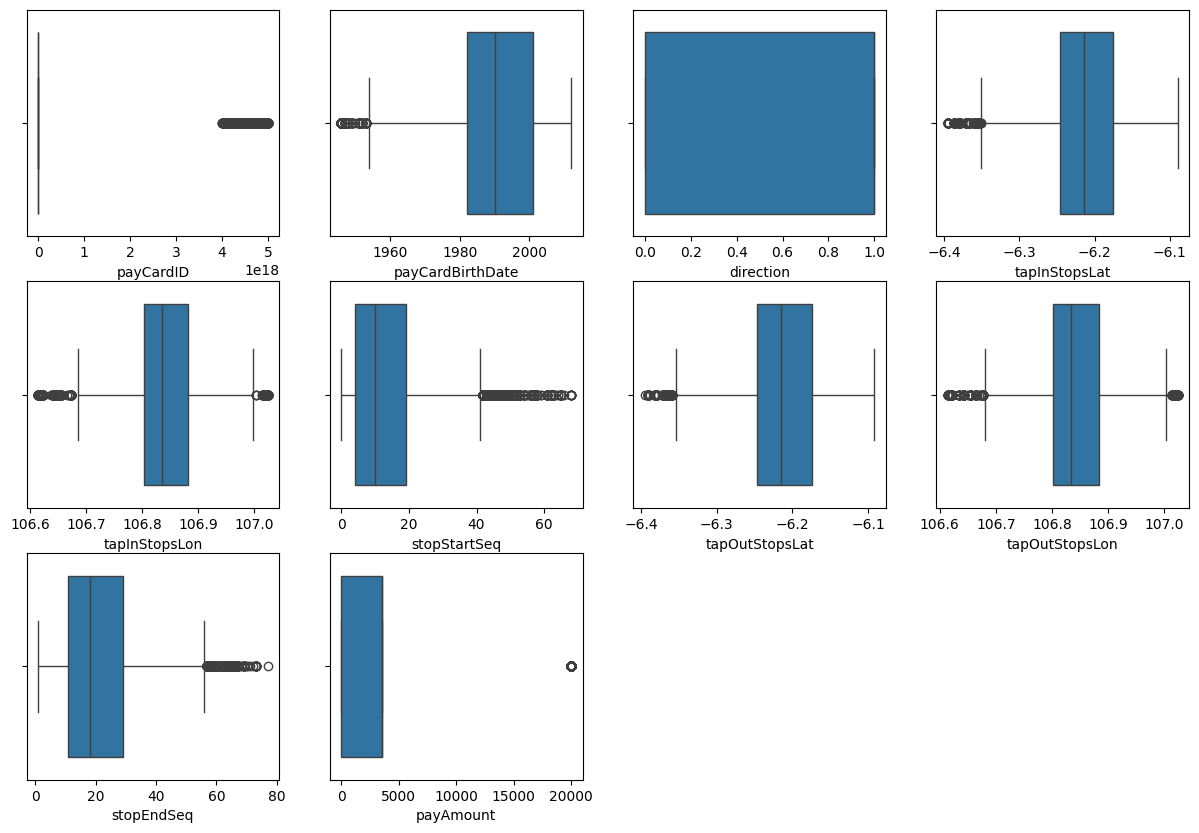

In [ ]:
# ambil kolom yang numerik
numerik = df.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (15,10)) # (kolom, bairs)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(3, 4, posisi) # (baris, kolom, posisi)
    sns.boxplot(x = df[kolom])
    posisi += 1

# mengeprint grafik
plt.show()


Setelah mendeteksi outliers, kita perlu memutuskan apakah

- Menghapus Outliers: Jika nilai outliers adalah kesalahan data (contoh: nilai negatif pada kolom pembayaran)

- Membiarkan Outliers: Jika outliers memang relevan secara bisnis (contoh: pembayaran besar yang valid)

### Mengecek Duplikasi Data

In [ ]:
# Mengecek jumlah data duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_rows}")

Jumlah data duplikat: 0


Karena tidak ada data duplikat maka kita tidak perlu menghapusnya

## DATA CLEANING

### Mengatasi Missing Values

In [ ]:
# Mengecek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


In [ ]:
# Drop baris dengan missing values di kolom penting (jika ada)
df = df.dropna(subset=['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'tapInTime', 'tapOutTime'])

In [ ]:
# Verifikasi setelah penghapusan
print("Jumlah missing values setelah cleaning:")
print(df.isnull().sum())

Jumlah missing values setelah cleaning:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1205
corridorName        1854
direction              0
tapInStops          1177
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          945
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount            968
dtype: int64


Insight:

- Missing values diperiksa pada kolom penting seperti tapInStopsLat, tapInStopsLon, tapOutStopsLat, tapOutStopsLon, tapInTime, dan tapOutTime.
- Baris dengan missing values di kolom ini dihapus karena data tersebut tidak dapat digunakan untuk analisis.
- Tujuan: Menghapus data yang tidak lengkap agar analisis tidak bias.

<Axes: >

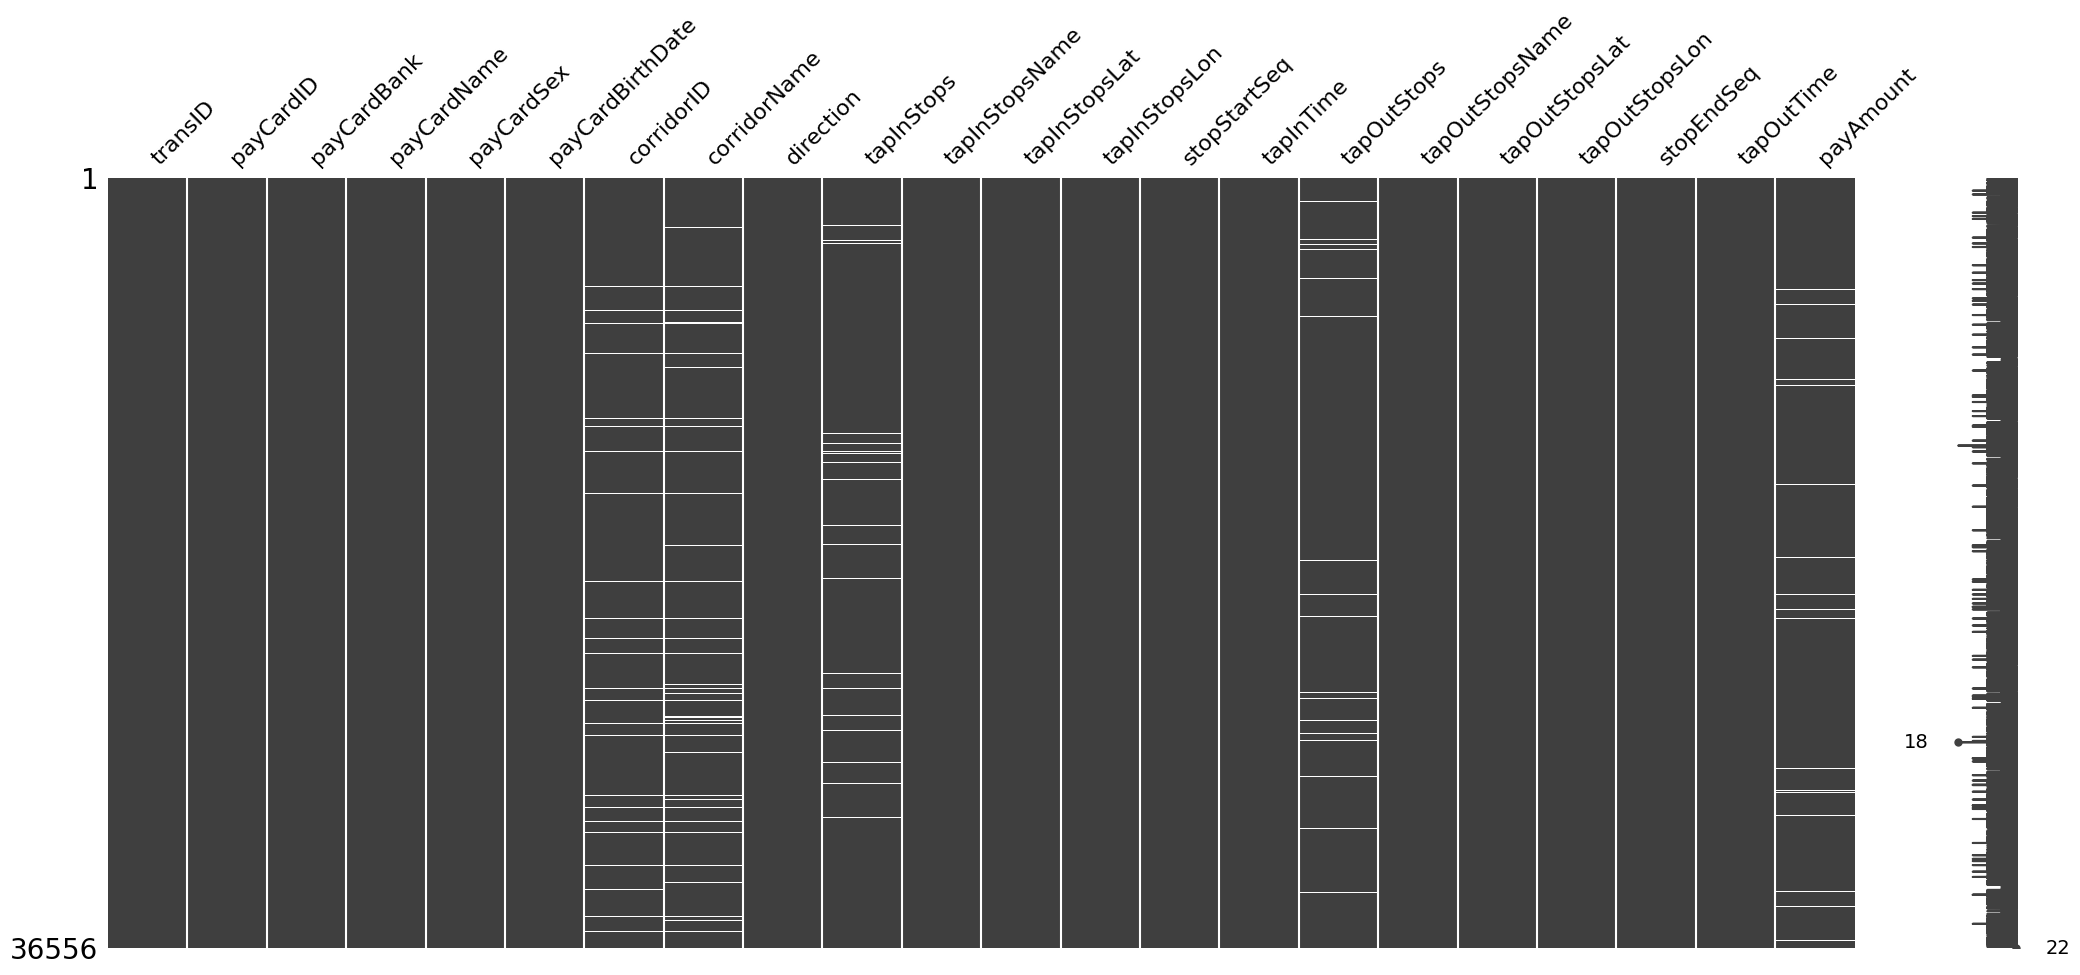

In [ ]:
import missingno as msno

msno.matrix(df)

### Pemeriksaan dan Perbaikan Format Data

In [ ]:
# Konversi kolom waktu ke format datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Verifikasi tipe data setelah konversi
print(df.dtypes)


transID                     object
payCardID                    int64
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
corridorID                  object
corridorName                object
direction                  float64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                 float64
tapOutTime          datetime64[ns]
payAmount                  float64
dtype: object


Insight:

- Kolom tapInTime dan tapOutTime dikonversi ke format datetime untuk memudahkan perhitungan waktu tempuh.
- Tujuan: Memastikan tipe data sesuai untuk analisis waktu.

### Pembuatan Kolom Baru

#### Menghitung Waktu Tempuh dalam Menit

In [ ]:
# Hitung waktu tempuh dalam menit
df['travel_time_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Tampilkan beberapa data untuk verifikasi
df[['tapInTime', 'tapOutTime', 'travel_time_minutes']].head()


,tapInTime,tapOutTime,travel_time_minutes
0,2023-04-03 05:21:44,2023-04-03 06:00:53,39.150000
1,2023-04-03 05:42:44,2023-04-03 06:40:01,57.283333
2,2023-04-03 05:59:06,2023-04-03 06:50:55,51.816667
3,2023-04-03 05:44:51,2023-04-03 06:28:16,43.416667
4,2023-04-03 06:17:35,2023-04-03 06:57:03,39.466667


#### Menghitung Jarak Perjalanan (Haversine)

In [ ]:
# Fungsi untuk menghitung jarak menggunakan formula haversine
def calculate_distance(row):
    start_coords = (row['tapInStopsLat'], row['tapInStopsLon'])
    end_coords = (row['tapOutStopsLat'], row['tapOutStopsLon'])
    return geodesic(start_coords, end_coords).kilometers




In [ ]:
# Tambahkan kolom jarak perjalanan
df['distance_km'] = df.apply(calculate_distance, axis=1)

In [ ]:
# Tampilkan beberapa data untuk verifikasi
df[['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'distance_km']].head()

,tapInStopsLat,tapInStopsLon,tapOutStopsLat,tapOutStopsLon,distance_km
0,-6.184631,106.84402,-6.203101,106.85715,2.506718
1,-6.228700,106.83302,-6.217152,106.81892,2.016381
2,-6.133132,106.81435,-6.133731,106.81475,0.079676
3,-6.195743,106.93526,-6.183068,106.93194,1.449053
4,-6.149650,106.88900,-6.135355,106.81143,8.730128


Insight:
- Waktu tempuh dihitung sebagai selisih antara tapOutTime dan tapInTime, kemudian dikonversi ke menit.
- Jarak perjalanan dihitung menggunakan formula Haversine, yang menghitung jarak lintasan terpendek antara dua koordinat geografis.
- Tujuan: Menambahkan kolom baru yang relevan untuk analisis efisiensi perjalanan.


### Pemeriksaan dan Penanganan Outlier

#### Menghapus Waktu Tempuh Negatif

In [ ]:
# Hapus data dengan waktu tempuh negatif
df = df[df['travel_time_minutes'] > 0]


#### Menghapus Jarak Nol atau Sangat Kecil

In [ ]:
# Hapus data dengan jarak nol atau sangat kecil
df = df[df['distance_km'] > 0.01]  # 0.01 km = 10 meter


#### Menghapus Waktu Tempuh yang Tidak Wajar

In [ ]:
# Hapus perjalanan dengan waktu tempuh terlalu lama dibandingkan jarak
df = df[df['travel_time_minutes'] < (df['distance_km'] * 60)]  # Rasio maksimum 60 menit/km


Insight:

- Data dengan waktu tempuh negatif dihapus karena tidak logis (kesalahan pencatatan waktu).
- Data dengan jarak nol atau sangat kecil dihapus karena tidak relevan untuk analisis.
- Data dengan waktu tempuh terlalu lama dibandingkan jarak juga dihapus karena kemungkinan besar merupakan kesalahan pencatatan.
- Tujuan: Menghapus data yang tidak valid agar analisis lebih akurat.

### Dataset Siap untuk Analisis

In [ ]:
# Tampilkan informasi dataset setelah cleaning
print("Jumlah data setelah cleaning:", len(df))
df.head()


Jumlah data setelah cleaning: 22990


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,travel_time_minutes,distance_km
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000,2.506718
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333,2.016381
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667,1.449053
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667,8.730128
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,27.316667,2.029862


Insight:

- Dataset yang sudah dibersihkan siap untuk dianalisis. Kolom-kolom penting seperti travel_time_minutes dan distance_km telah ditambahkan, dan data tidak valid telah dihapus.
- Tujuan: Dataset akhir hanya berisi data yang relevan dan bersih.

### Pemeriksaan Missing Values Setelah Cleaning

Setelah semua langkah data cleaning selesai, kita dapat memeriksa kembali apakah masih ada missing values di dataset dengan cara berikut:

In [ ]:
# Periksa kembali missing values di seluruh kolom
missing_values_after_cleaning = df.isnull().sum()
print("Jumlah missing values setelah proses cleaning:")
print(missing_values_after_cleaning)

# Jika ada missing values, tampilkan kolom yang memiliki missing values
if missing_values_after_cleaning.sum() > 0:
    print("\nKolom dengan missing values:")
    print(missing_values_after_cleaning[missing_values_after_cleaning > 0])
else:
    print("\nTidak ada lagi missing values di dataset!")


Jumlah missing values setelah proses cleaning:
transID                   0
payCardID                 0
payCardBank               0
payCardName               0
payCardSex                0
payCardBirthDate          0
corridorID              778
corridorName           1198
direction                 0
tapInStops              734
tapInStopsName            0
tapInStopsLat             0
tapInStopsLon             0
stopStartSeq              0
tapInTime                 0
tapOutStops             595
tapOutStopsName           0
tapOutStopsLat            0
tapOutStopsLon            0
stopEndSeq                0
tapOutTime                0
payAmount               469
travel_time_minutes       0
distance_km               0
dtype: int64

Kolom dengan missing values:
corridorID       778
corridorName    1198
tapInStops       734
tapOutStops      595
payAmount        469
dtype: int64


Ternyata setelah kita cek masih ada beberapa missing values di beberapa kolom

####Hapus Baris dengan Missing Values di Kolom Penting
- Kolom penting untuk analisis adalah tapInStops dan tapOutStops, karena data ini digunakan untuk menghitung jarak perjalanan.
- Baris dengan missing values di kolom ini harus dihapus.

In [ ]:
# Hapus baris dengan missing values di tapInStops dan tapOutStops
df = df.dropna(subset=['tapInStops', 'tapOutStops'])


#### Isi Missing Values di Kolom yang Tidak Esensial

In [ ]:
# Isi missing values dengan nilai default
df['corridorID'] = df['corridorID'].fillna(-1)
df['corridorName'] = df['corridorName'].fillna('Unknown')
df['payAmount'] = df['payAmount'].fillna(df['payAmount'].median())


#### Verifikasi Dataset

In [ ]:
# Periksa kembali missing values
print("Jumlah missing values setelah penanganan:")
print(df.isnull().sum())


Jumlah missing values setelah penanganan:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
travel_time_minutes    0
distance_km            0
dtype: int64


In [ ]:
# Menghapus baris dengan nilai kosong pada kolom relevan untuk analisis
cleaned_df = df.dropna(subset=['tapOutStopsLat', 'tapOutStopsLon', 'tapOutTime'])

# Menampilkan jumlah data setelah pembersihan
print("Jumlah data setelah pembersihan:", len(cleaned_df))

# Menampilkan 5 baris pertama dari data yang telah dibersihkan
print("\
5 baris pertama dari data yang telah dibersihkan:")
display(cleaned_df.head())

Jumlah data setelah pembersihan: 21678
5 baris pertama dari data yang telah dibersihkan:


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,travel_time_minutes,distance_km
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000,2.506718
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333,2.016381
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,43.416667,1.449053
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,39.466667,8.730128
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,-1,Unknown,1.0,B03416P,...,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,27.316667,2.029862


<Axes: >

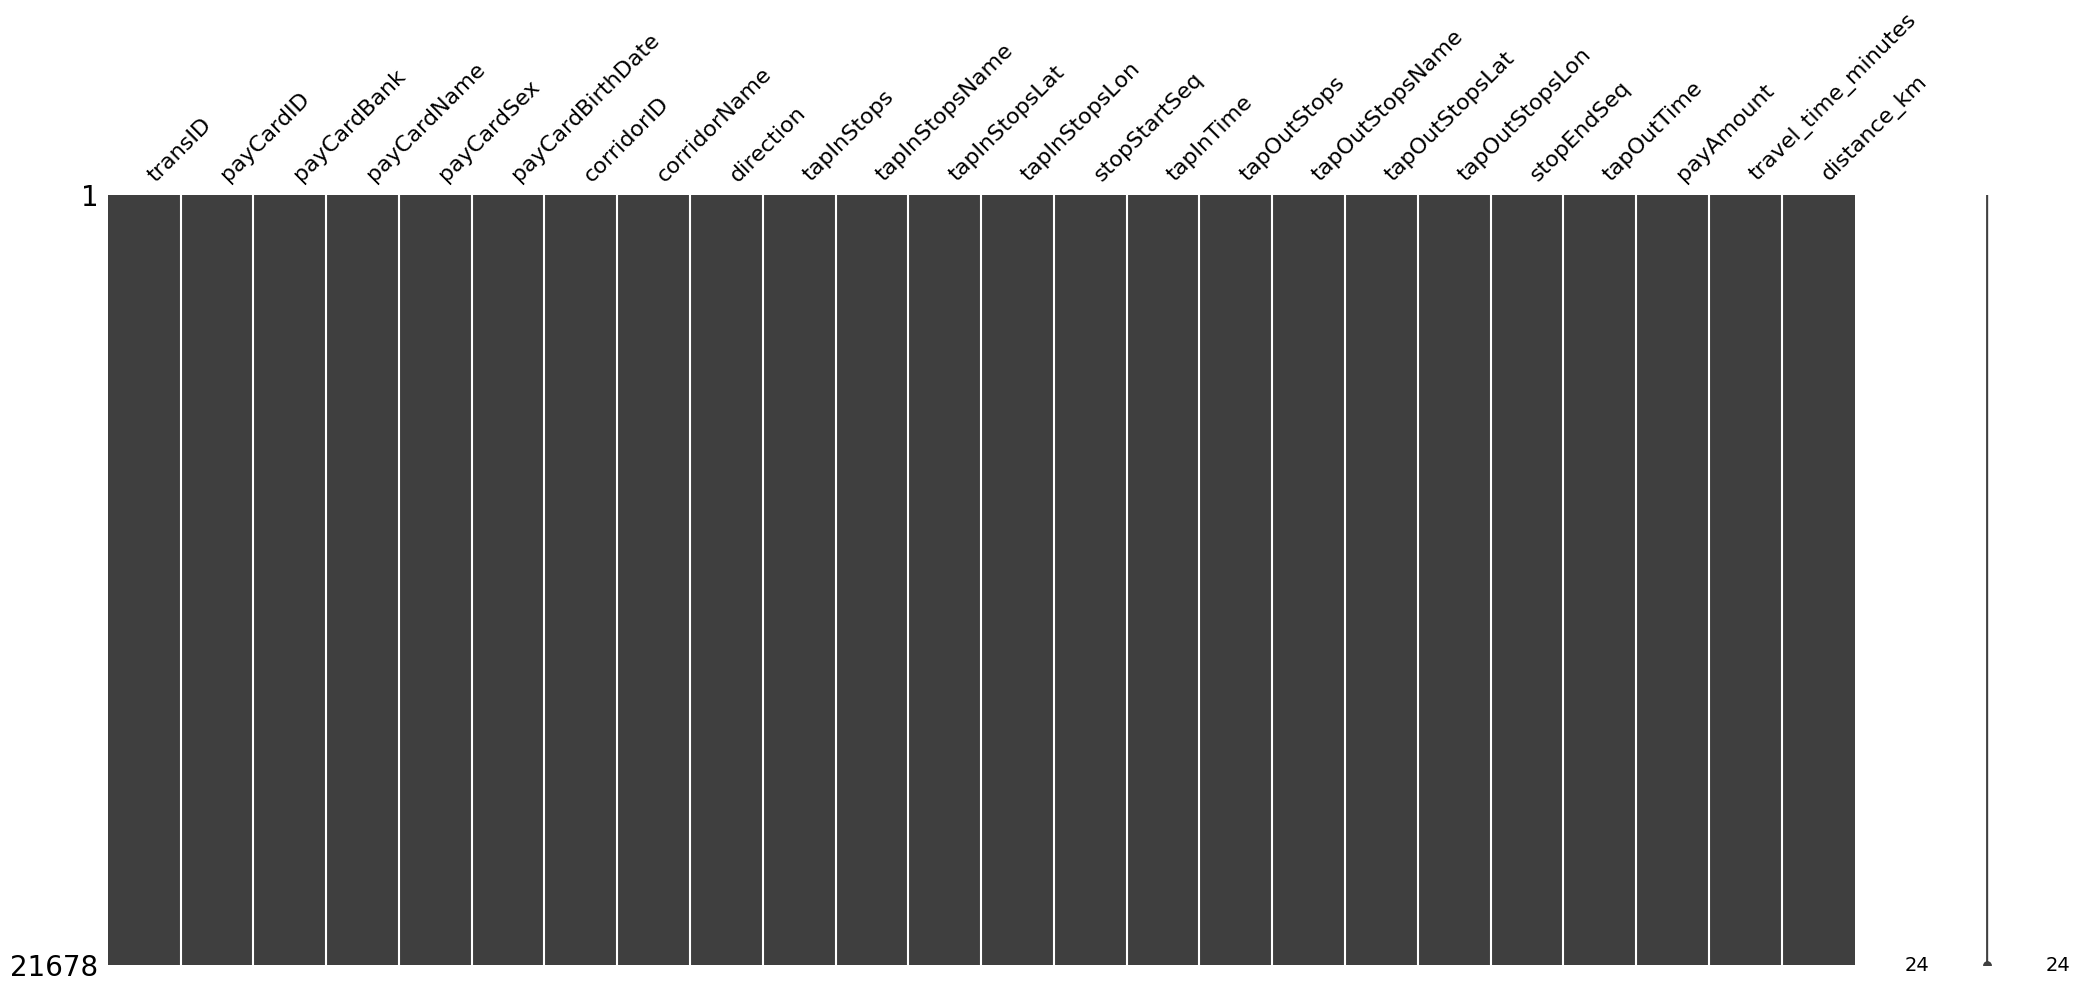

In [ ]:
import missingno as msno

msno.matrix(df)

In [ ]:
from google.colab import files
df.to_csv('data_transjakarta.csv', index=False)
files.download('data_transjakarta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Kesimpulan Data Cleaning
1.  Missing Values:
- Missing values dihapus dari kolom penting seperti koordinat dan waktu.
Dataset menjadi lebih bersih dan lengkap.
2. Format Data:
- Kolom waktu dikonversi ke format datetime.
- Kolom tambahan seperti travel_time_minutes dan distance_km dihitung.
3. Outlier:
- Data dengan waktu tempuh negatif, jarak nol, atau waktu tempuh tidak wajar dihapus.
4. Dataset Akhir:
- Dataset bersih dan siap digunakan untuk analisis lebih lanjut, seperti mendeteksi anomali waktu tempuh vs jarak.

## ANALISA DETEKSI ANOMALI WAKTU TEMPUH vs JARAK

### Hitung Jarak Perjalanan

In [ ]:
from geopy.distance import geodesic
import numpy as np

# Function to calculate distance between two points (tapIn and tapOut)
def calculate_distance(row):
    if not np.isnan(row['tapOutStopsLat']) and not np.isnan(row['tapOutStopsLon']):
        start_coords = (row['tapInStopsLat'], row['tapInStopsLon'])
        end_coords = (row['tapOutStopsLat'], row['tapOutStopsLon'])
        return geodesic(start_coords, end_coords).kilometers
    return np.nan

# Apply the distance calculation
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Display the calculated distances
df[['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'distance_km']].head()


,tapInStopsLat,tapInStopsLon,tapOutStopsLat,tapOutStopsLon,distance_km
0,-6.184631,106.84402,-6.203101,106.85715,2.506718
1,-6.228700,106.83302,-6.217152,106.81892,2.016381
3,-6.195743,106.93526,-6.183068,106.93194,1.449053
4,-6.149650,106.88900,-6.135355,106.81143,8.730128
7,-6.313269,106.80221,-6.311046,106.78400,2.029862


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    # Konversi derajat ke radian
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371  # Radius bumi dalam kilometer
    return r * c

# Tambahkan kolom jarak ke dataset
df['distance_km'] = haversine(df['tapInStopsLat'], df['tapInStopsLon'],
                              df['tapOutStopsLat'], df['tapOutStopsLon'])


### Hitung Waktu Tempuh (Travel Time)

In [ ]:
# Konversi kolom waktu menjadi format datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Hitung waktu tempuh dalam menit
df['travel_time_minutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60


### Analisis Hubungan Waktu Tempuh vs Jarak

Visualisasi Data

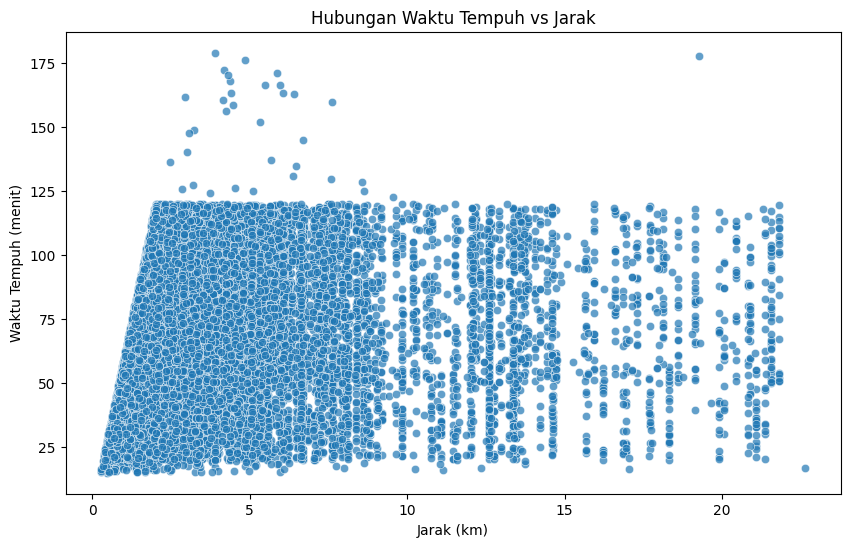

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot waktu tempuh vs jarak
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_km', y='travel_time_minutes', alpha=0.7)
plt.title('Hubungan Waktu Tempuh vs Jarak')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Tempuh (menit)')
plt.show()


Identifikasi Anomali

Anomali dapat diidentifikasi sebagai data yang berada jauh di luar pola umum. Misalnya:

- Waktu tempuh terlalu lama untuk jarak pendek.
- Waktu tempuh terlalu cepat untuk jarak jauh.

### Deteksi Anomali dengan Z-Score

In [ ]:
from scipy.stats import zscore

# Hitung z-score untuk waktu tempuh
df['z_score_travel_time'] = zscore(df['travel_time_minutes'])

# Tentukan threshold untuk anomali (misalnya, z-score > 3 atau z-score < -3)
threshold = 3
anomalies = df[(df['z_score_travel_time'] > threshold) | (df['z_score_travel_time'] < -threshold)]

# Tampilkan data anomali
print("Jumlah anomali yang terdeteksi:", len(anomalies))
display(anomalies)


Jumlah anomali yang terdeteksi: 18


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,travel_time_minutes,distance_km,z_score_travel_time
37600,JBXW168V4D98VE,561500422432,flazz,"Sabrina Megantara, M.Farm",F,2007,10A,Rusun Marunda - Tanjung Priok,0.0,B05078P,...,P00055,Enggano,-6.110150,106.892420,6.0,2023-04-30 19:48:13,0.0,159.633333,7.618838,3.349501
37608,JPVH867T7U10EV,576927814706,flazz,Lili Siregar,M,1982,M1,Blok M - Kota,1.0,P00025,...,P00017,Blok M,-6.243312,106.801750,21.0,2023-04-17 12:02:28,3500.0,163.216667,6.065425,3.478015
37615,JEES739W6T40LL,3563362178943707,dki,drg. Michelle Puspita,F,1968,2E,Rusun Rawa Bebek - Kodamar,0.0,B00554P,...,B01850P,Kayu Mas,-6.179110,106.902550,25.0,2023-04-25 00:30:08,0.0,163.200000,4.394854,3.477417
37616,XLHG339H5Q70WA,6011718497540493,dki,Langgeng Handayani,M,2006,10K,Tanjung Priok - Senen via Taman BMW,1.0,B03729P,...,B01745P,Jembatan Item,-6.130078,106.854920,27.0,2023-04-23 08:35:44,3500.0,179.050000,3.909934,4.045867
37619,GMZR235N6X03PL,60427539402,flazz,"Lanang Firmansyah, M.Farm",F,1983,6A,Ragunan - MH Thamrin via Kuningan,1.0,P00121,...,P00164,Pejaten,-6.278404,106.829720,14.0,2023-04-12 16:22:23,3500.0,176.383333,4.856832,3.950229
37623,DYHP437D4U26RS,6540723056644645,dki,Tgk. Wani Prasetyo,M,2011,JAK.110A,Rusun Marunda - Terminal Terpadu Pulo Gebang,1.0,B03293P,...,B00074P,Asrama Marinir Marunda 2,-6.114579,106.950230,65.0,2023-04-13 10:18:31,0.0,172.133333,4.170198,3.797805
37632,ZLGL981L6M64XP,2400990004481721,dki,Cut Ika Narpati,M,1975,4B,Stasiun Manggarai - UI,1.0,B00731P,...,B02342P,Masjid Jami Baiturrahman,-6.216586,106.844120,43.0,2023-04-13 16:44:29,3500.0,166.316667,5.482135,3.589194
37665,AUTZ510U0Y33OV,3559527684074603,dki,Arsipatra Anggriawan,F,1983,D31,Cinere - Kuningan,1.0,B06645P,...,B05399P,South City Cinere,-6.345040,106.767638,17.0,2023-04-19 14:47:36,20000.0,161.933333,2.944703,3.431989
37674,JXJU834Q7X41YL,4558670606659888636,brizzi,Tantri Siregar,M,1996,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B03305P,...,B03318P,Sawo Kecik Raya,-6.224852,106.854890,22.0,2023-04-21 16:56:14,3500.0,167.966667,4.357803,3.648371
37710,HKNX358D5Z87BY,4387100690520898,dki,Lintang Agustina,F,1998,M5,Matraman Baru - Ancol,0.0,P00213,...,P00092,Jembatan Merah,-6.146731,106.834270,12.0,2023-04-19 17:37:28,3500.0,171.000000,5.865279,3.757159


### Analisis dan Interpretasi

1. Segmentasi Data Berdasarkan Faktor-Faktor Relevan
Agar lebih mudah memahami pola anomali, kita dapat membagi data ke dalam beberapa segmen berdasarkan faktor-faktor berikut:

- Koridor atau Jalur (corridorID atau corridorName):
Beberapa koridor mungkin lebih rawan anomali karena kemacetan, infrastruktur, atau rute yang lebih panjang.
- Waktu (tapInTime):
Segmentasi berdasarkan jam sibuk (misalnya, 07:00–09:00 dan 17:00–19:00) dan jam non-sibuk.
- Jarak (distance_km):
Pisahkan data menjadi kategori jarak pendek, menengah, dan panjang untuk melihat apakah ada pola yang berbeda.

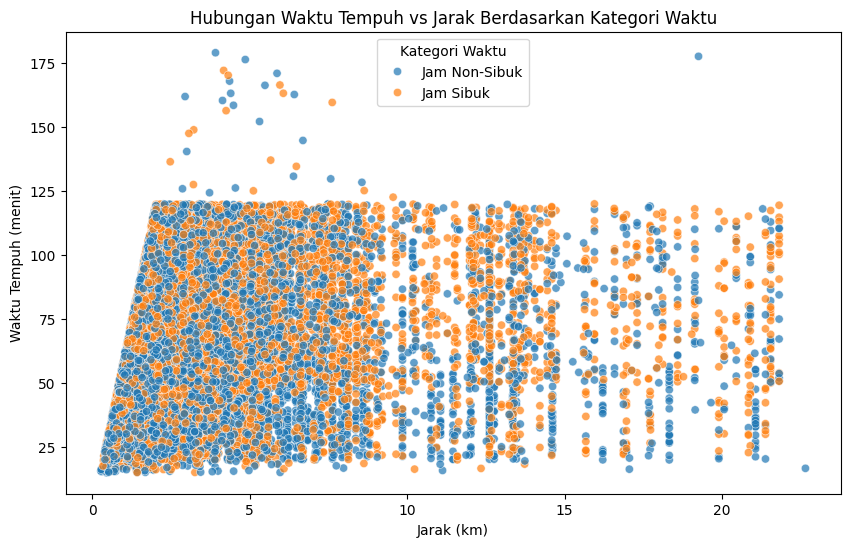

In [ ]:
# Tambahkan kolom waktu (jam) dari tapInTime
df['hour'] = df['tapInTime'].dt.hour

# Kategorikan waktu menjadi jam sibuk dan non-sibuk
def categorize_time(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Jam Sibuk'
    else:
        return 'Jam Non-Sibuk'

df['time_category'] = df['hour'].apply(categorize_time)

# Analisis scatter plot berdasarkan kategori waktu
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_km', y='travel_time_minutes', hue='time_category', alpha=0.7)
plt.title('Hubungan Waktu Tempuh vs Jarak Berdasarkan Kategori Waktu')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Tempuh (menit)')
plt.legend(title='Kategori Waktu')
plt.show()


2. Analisis Statistik untuk Memahami Pola Normal
Sebelum mendeteksi anomali, kita perlu memahami pola normal waktu tempuh vs jarak. Beberapa langkah yang bisa dilakukan:

- Hitung rata-rata waktu tempuh per kategori jarak.
- Hitung standar deviasi untuk menentukan rentang normal waktu tempuh.

In [ ]:
# Kategorikan jarak menjadi pendek, menengah, dan panjang
def categorize_distance(distance):
    if distance < 5:
        return 'Pendek'
    elif 5 <= distance <= 15:
        return 'Menengah'
    else:
        return 'Panjang'

df['distance_category'] = df['distance_km'].apply(categorize_distance)

# Hitung statistik waktu tempuh berdasarkan kategori jarak
stats = df.groupby('distance_category')['travel_time_minutes'].agg(['mean', 'std', 'min', 'max']).reset_index()
display(stats)


,distance_category,mean,std,min,max
0,Menengah,72.151505,28.060330,15.116667,171.000000
1,Panjang,70.031296,28.186166,16.383333,177.633333
2,Pendek,64.552716,27.601856,15.000000,179.050000


Hasil ini dapat digunakan untuk menentukan rentang waktu tempuh yang wajar untuk setiap kategori jarak. Misalnya:

- Untuk jarak pendek (<5 km), waktu tempuh wajar mungkin antara 5–20 menit.
- Untuk jarak menengah (5–15 km), waktu tempuh wajar mungkin antara 15–40 menit.
- Untuk jarak panjang (>15 km), waktu tempuh wajar mungkin antara 30–90 menit.

3.  Identifikasi Anomali Lebih Akurat menggunakan IQR

In [ ]:
# Hitung IQR untuk waktu tempuh
Q1 = df['travel_time_minutes'].quantile(0.25)
Q3 = df['travel_time_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi anomali
df['is_anomaly_iqr'] = (df['travel_time_minutes'] < lower_bound) | (df['travel_time_minutes'] > 120)

# Tampilkan jumlah anomali
print("Jumlah anomali berdasarkan IQR:", df['is_anomaly_iqr'].sum())


Jumlah anomali berdasarkan IQR: 35


4. Analisis Pola Anomali
Setelah mendeteksi anomali, langkah berikutnya adalah menganalisis pola anomali untuk mendapatkan wawasan yang lebih mendalam. Beberapa pertanyaan yang bisa dijawab:

- Apakah anomali lebih sering terjadi pada koridor tertentu?
- Apakah anomali lebih sering terjadi pada jam sibuk atau non-sibuk?
- Apakah ada kategori jarak tertentu yang lebih rentan terhadap anomali?

Anomali Berdasarkan Koridor

In [ ]:
# Pastikan kolom 'corridorName' tidak memiliki nilai kosong
df['corridorName'] = df['corridorName'].fillna('Unknown')

# Hitung jumlah anomali per koridor
anomaly_corridor = df[df['is_anomaly_iqr']].groupby('corridorName').size().reset_index(name='anomaly_count')

# Urutkan hasil berdasarkan jumlah anomali
anomaly_corridor = anomaly_corridor.sort_values(by='anomaly_count', ascending=False)

print("Jumlah anomali berdasarkan koridor:")
display(anomaly_corridor)


Jumlah anomali berdasarkan koridor:


,corridorName,anomaly_count
8,Kampung Melayu - Pulo Gadung,2
12,Matraman Baru - Ancol,2
6,Ciputat - CSW,2
25,Tanjung Priok - Senen via Taman BMW,1
20,Rusun Rawa Bebek - Kodamar,1
21,Rusun Sindang Koja - Kp. Sawah,1
22,Stasiun Manggarai - UI,1
23,Stasiun Tebet - Rusun Karet Tengsin,1
24,Tanjung Priok - PGC 2,1
0,Bintaro - Fatmawati,1


Anomali Berdasarkan Kategori Waktu


In [ ]:
# Pastikan kolom 'time_category' sudah ada
if 'time_category' not in df.columns:
    def categorize_time(hour):
        if 7 <= hour <= 9 or 17 <= hour <= 19:
            return 'Jam Sibuk'
        else:
            return 'Jam Non-Sibuk'
    df['time_category'] = df['hour'].apply(categorize_time)

# Hitung jumlah anomali per kategori waktu
anomaly_time = df[df['is_anomaly_iqr']].groupby('time_category').size().reset_index(name='anomaly_count')

print("Jumlah anomali berdasarkan kategori waktu:")
display(anomaly_time)


Jumlah anomali berdasarkan kategori waktu:


,time_category,anomaly_count
0,Jam Non-Sibuk,20
1,Jam Sibuk,15


Anomali Berdasarkan Kategori Jarak

In [ ]:
# Pastikan kolom 'distance_category' sudah ada
if 'distance_category' not in df.columns:
    def categorize_distance(distance):
        if distance < 5:
            return 'Pendek'
        elif 5 <= distance <= 15:
            return 'Menengah'
        else:
            return 'Panjang'
    df['distance_category'] = df['distance_km'].apply(categorize_distance)

# Hitung jumlah anomali per kategori jarak
anomaly_distance = df[df['is_anomaly_iqr']].groupby('distance_category').size().reset_index(name='anomaly_count')

print("Jumlah anomali berdasarkan kategori jarak:")
display(anomaly_distance)


Jumlah anomali berdasarkan kategori jarak:


,distance_category,anomaly_count
0,Menengah,16
1,Panjang,1
2,Pendek,18


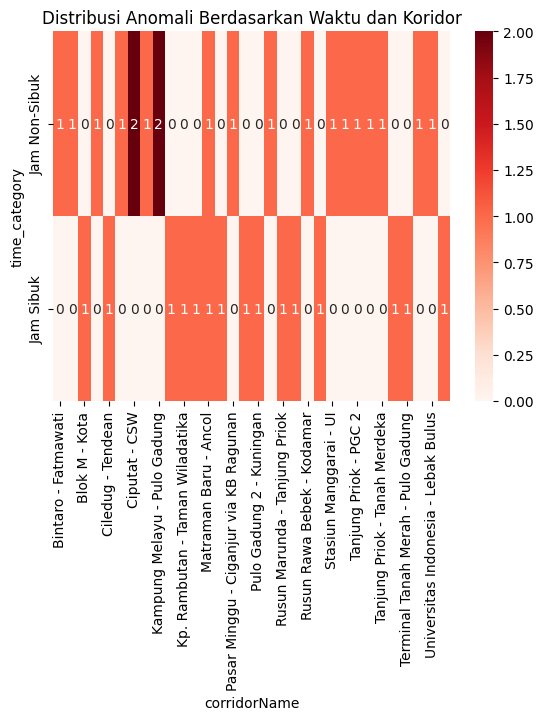

In [ ]:
# Heatmap untuk distribusi anomali berdasarkan waktu dan koridor
pivot_table = df[df['is_anomaly_iqr']].pivot_table(index='time_category', columns='corridorName', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds')
plt.title('Distribusi Anomali Berdasarkan Waktu dan Koridor')
plt.show()


Visualisasi terhadap Hubungan Jarak vs Waktu Tempuh dengan Anomali

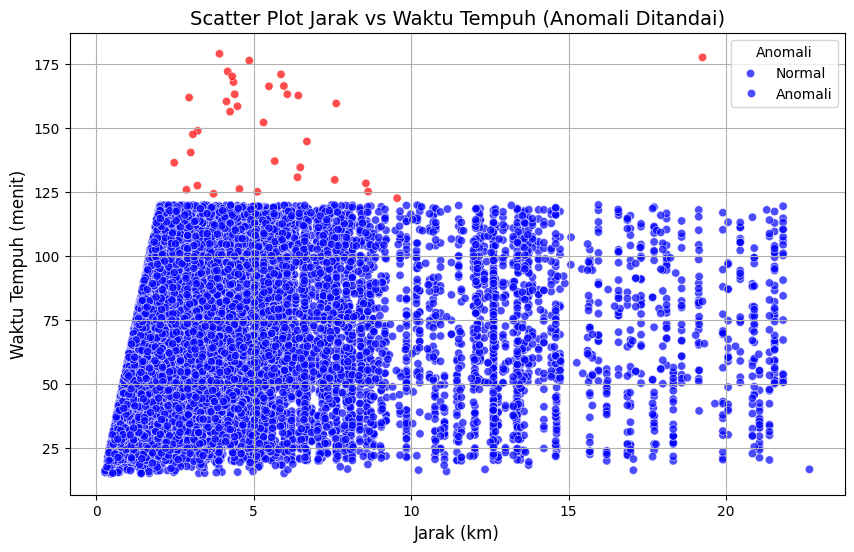

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot jarak vs waktu tempuh
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_km', y='travel_time_minutes', hue='is_anomaly_iqr',
                palette={False: 'blue', True: 'red'}, alpha=0.7)
plt.title('Scatter Plot Jarak vs Waktu Tempuh (Anomali Ditandai)', fontsize=14)
plt.xlabel('Jarak (km)', fontsize=12)
plt.ylabel('Waktu Tempuh (menit)', fontsize=12)
plt.legend(title='Anomali', labels=['Normal', 'Anomali'])
plt.grid(True)
plt.show()


- Titik biru menunjukkan data normal.
- Titik merah menunjukkan data anomali.
- Anda dapat melihat bagaimana anomali menyimpang dari pola umum.


In [ ]:
# Menghitung jarak antara titik masuk dan keluar menggunakan geopy
# Fungsi untuk menghitung jarak dalam kilometer
def calculate_distance(row):
    start_coords = (row['tapInStopsLat'], row['tapInStopsLon'])
    end_coords = (row['tapOutStopsLat'], row['tapOutStopsLon'])
    return geodesic(start_coords, end_coords).kilometers

# Menambahkan kolom baru untuk jarak
cleaned_df['distance_km'] = cleaned_df.apply(calculate_distance, axis=1)

# Menghitung waktu tempuh dalam menit
def calculate_travel_time(row):
    tap_in_time = pd.to_datetime(row['tapInTime'])
    tap_out_time = pd.to_datetime(row['tapOutTime'])
    return (tap_out_time - tap_in_time).total_seconds() / 60

# Menambahkan kolom baru untuk waktu tempuh
cleaned_df['travel_time_min'] = cleaned_df.apply(calculate_travel_time, axis=1)

# Menampilkan 5 baris pertama dengan kolom baru
print("5 baris pertama dengan jarak dan waktu tempuh:")
display(cleaned_df[['distance_km', 'travel_time_min']].head())

5 baris pertama dengan jarak dan waktu tempuh:


,distance_km,travel_time_min
0,2.506718,39.150000
1,2.016381,57.283333
3,1.449053,43.416667
4,8.730128,39.466667
7,2.029862,27.316667


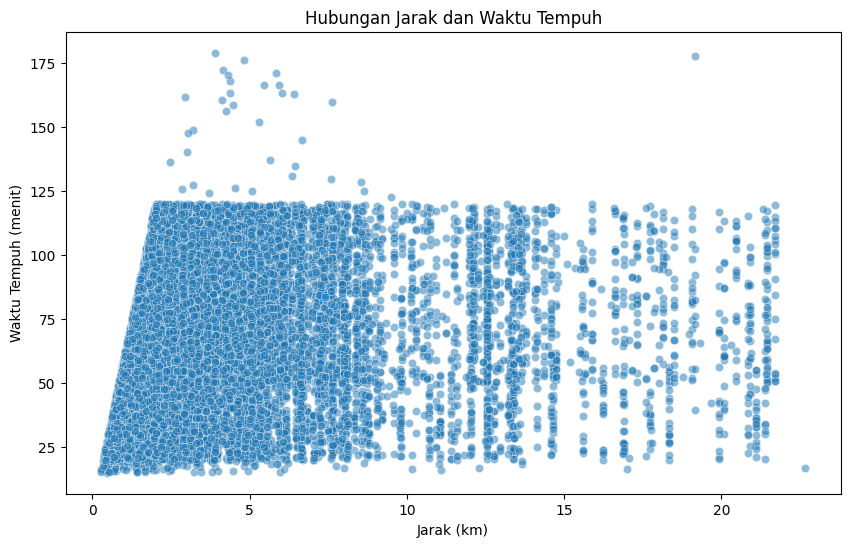

In [ ]:
# Visualisasi hubungan antara jarak dan waktu tempuh untuk mendeteksi anomali
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='distance_km', y='travel_time_min', alpha=0.5)
plt.title('Hubungan Jarak dan Waktu Tempuh')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Tempuh (menit)')
plt.show()

kita perdalam lagi menggunakan median

Statistik median per koridor:


,travel_time_min,distance_km,median_speed_kmh
corridorName,,,
Kampung Rambutan - Blok M,89.07,4.94,3.33
Cinere - Kuningan,87.43,13.52,9.28
Bulak Ringin - Kampung Rambutan,80.97,3.02,2.24
Pangkalan Jati - Rawamangun,80.78,3.73,2.77
Grogol - Pos Pengumben via Slipi,80.65,2.01,1.50
...,...,...,...
Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang,31.64,0.74,1.40
Gondangdia - Balai Kota,29.51,0.54,1.10
Rusun Komarudin - Penggilingan,27.85,0.66,1.42


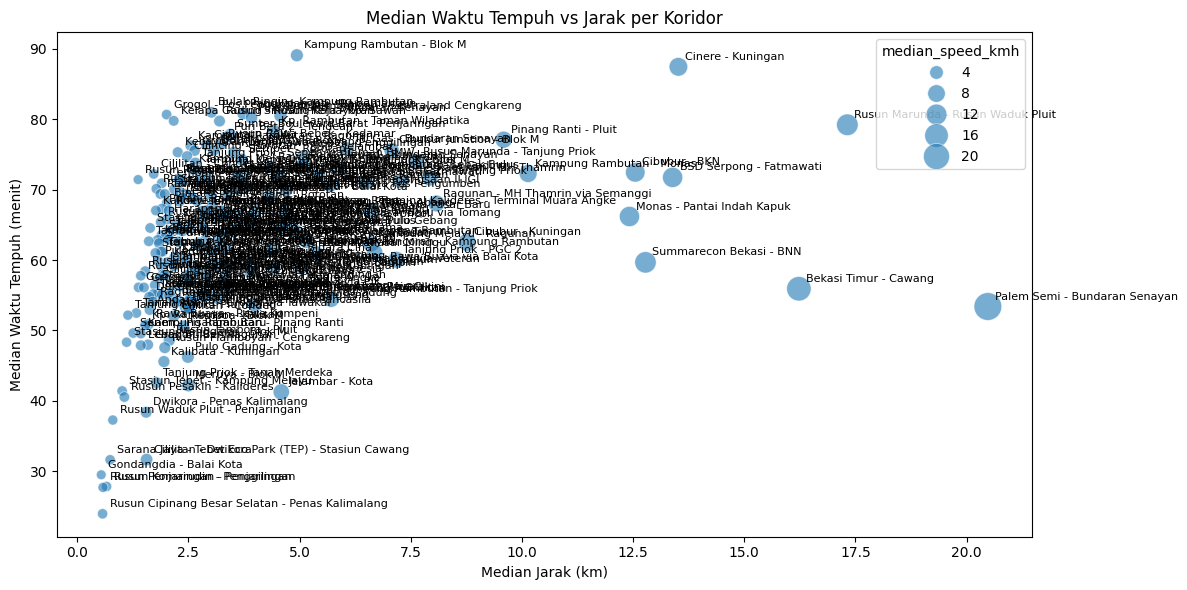

In [ ]:
# Menghitung median waktu tempuh dan jarak untuk setiap koridor
corridor_stats = cleaned_df.groupby('corridorName').agg({
    'travel_time_min': 'median',
    'distance_km': 'median',
}).round(2)

# Menambahkan kolom kecepatan median (km/jam)
corridor_stats['median_speed_kmh'] = (corridor_stats['distance_km'] / (corridor_stats['travel_time_min']/60)).round(2)

# Mengurutkan berdasarkan waktu tempuh
corridor_stats_sorted = corridor_stats.sort_values('travel_time_min', ascending=False)

print("Statistik median per koridor:")
display(corridor_stats_sorted)

# Visualisasi median waktu tempuh dan jarak
plt.figure(figsize=(12, 6))
sns.scatterplot(data=corridor_stats_sorted.reset_index(),
                x='distance_km',
                y='travel_time_min',
                size='median_speed_kmh',
                sizes=(50, 400),
                alpha=0.6)

plt.title('Median Waktu Tempuh vs Jarak per Koridor')
plt.xlabel('Median Jarak (km)')
plt.ylabel('Median Waktu Tempuh (menit)')

# Menambahkan label untuk setiap titik
for idx, row in corridor_stats_sorted.reset_index().iterrows():
    plt.annotate(row['corridorName'],
                (row['distance_km'], row['travel_time_min']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.show()

Dari data ini, kita dapat melihat bahwa:

- Koridor dengan waktu tempuh median tertinggi adalah Kampung Rambutan - Blok M (89.78 menit)
- Koridor Rusun Marunda - Rusun Waduk Pluit memiliki jarak median terpanjang (17.32 km)
- Kecepatan median bervariasi antar koridor, dengan beberapa koridor memiliki kecepatan yang relatif rendah

Kita perdalam kembali mengapa kampung rambutan - blok M memakan waktu yang lama

In [ ]:
# Analisis detail untuk koridor Kampung Rambutan - Blok M
kr_blokm = cleaned_df[cleaned_df['corridorName'] == 'Kampung Rambutan - Blok M']

# Menghitung statistik dasar
print("Statistik Dasar Koridor Kampung Rambutan - Blok M:")
print("\
Jumlah perjalanan:", len(kr_blokm))
print("\
Statistik waktu tempuh (menit):")
print(kr_blokm['travel_time_min'].describe().round(2))
print("\
Statistik jarak (km):")
print(kr_blokm['distance_km'].describe().round(2))

# Menambahkan kolom waktu
kr_blokm['hour'] = pd.to_datetime(kr_blokm['tapInTime']).dt.hour

# Analisis waktu tempuh berdasarkan jam
hourly_stats = kr_blokm.groupby('hour').agg({
    'travel_time_min': ['mean', 'median', 'count'],
    'distance_km': 'mean'
}).round(2)

print("\
Analisis berdasarkan jam:")
print(hourly_stats)



Statistik Dasar Koridor Kampung Rambutan - Blok M:
Jumlah perjalanan: 15
Statistik waktu tempuh (menit):
count     15.00
mean      79.90
std       33.60
min       15.87
25%       62.34
50%       89.07
75%      104.44
max      116.15
Name: travel_time_min, dtype: float64
Statistik jarak (km):
count    15.00
mean      5.18
std       2.23
min       2.46
25%       3.09
50%       4.94
75%       6.70
max       8.99
Name: distance_km, dtype: float64
Analisis berdasarkan jam:
     travel_time_min               distance_km
                mean  median count        mean
hour                                          
5              84.33   84.33     1        2.77
9              99.33   99.33     2        6.12
11            106.20  106.20     1        8.23
12            100.95  100.95     1        2.64
13            106.78  106.78     1        7.22
14             59.28   59.28     2        4.19
16            107.76  107.76     2        4.00
17             27.97   27.97     1        7.81
18        

<ipython-input-277-12217cb1b256>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kr_blokm['hour'] = pd.to_datetime(kr_blokm['tapInTime']).dt.hour


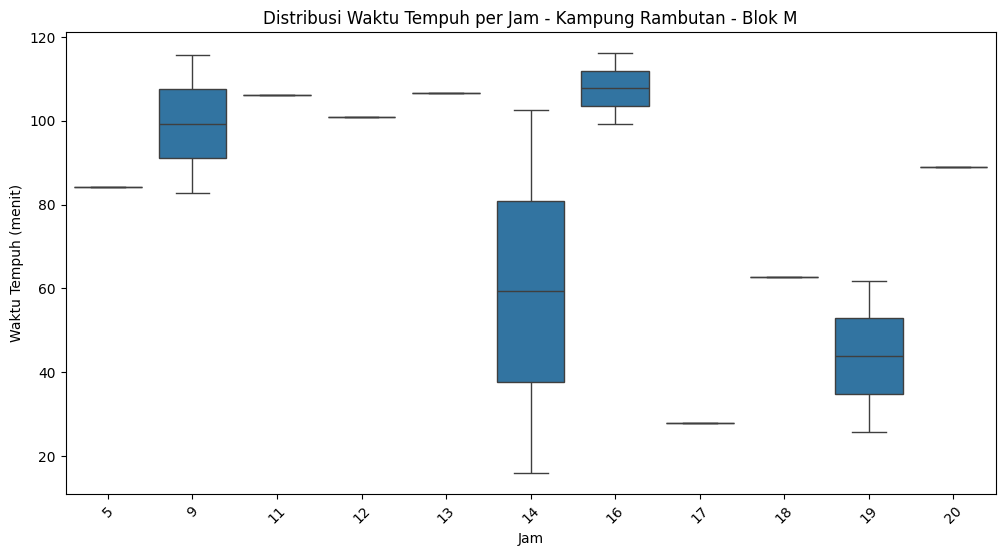

In [ ]:
# Visualisasi waktu tempuh berdasarkan jam
plt.figure(figsize=(12, 6))
sns.boxplot(data=kr_blokm, x='hour', y='travel_time_min')
plt.title('Distribusi Waktu Tempuh per Jam - Kampung Rambutan - Blok M')
plt.xlabel('Jam')
plt.ylabel('Waktu Tempuh (menit)')
plt.xticks(rotation=45)
plt.show()


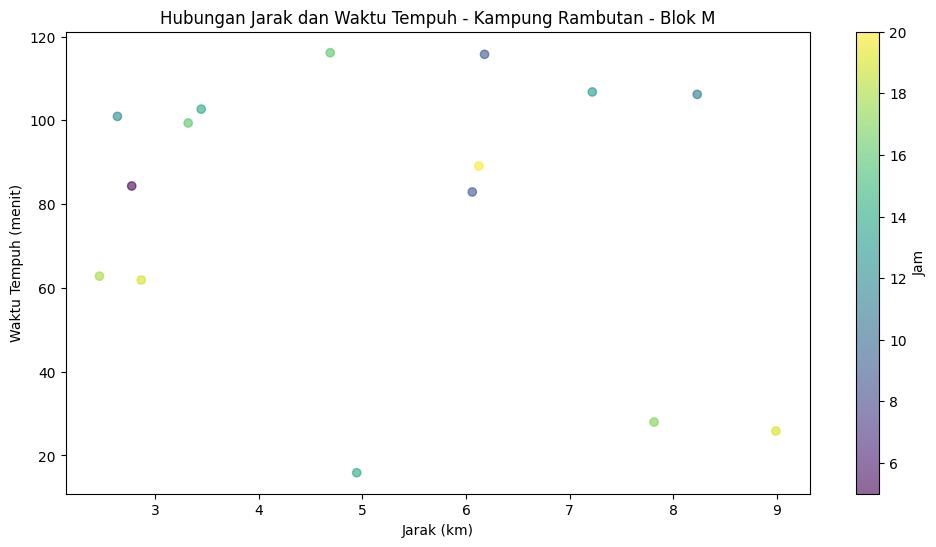

In [ ]:
# Scatter plot waktu vs jarak dengan warna berdasarkan jam
plt.figure(figsize=(12, 6))
scatter = plt.scatter(kr_blokm['distance_km'],
                     kr_blokm['travel_time_min'],
                     c=kr_blokm['hour'],
                     cmap='viridis',
                     alpha=0.6)
plt.colorbar(scatter, label='Jam')
plt.title('Hubungan Jarak dan Waktu Tempuh - Kampung Rambutan - Blok M')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Tempuh (menit)')
plt.show()

In [ ]:
# Fokus pada jam dengan waktu tempuh tertinggi
peak_hours = kr_blokm[kr_blokm['hour'].isin([9, 11, 13])]  # Jam dengan waktu tempuh tinggi berdasarkan analisis sebelumnya

# Statistik detail untuk jam puncak
print("Statistik detail untuk jam puncak (9, 11, 13):")
display(peak_hours[['hour', 'travel_time_min', 'distance_km']].describe().round(2))

Statistik detail untuk jam puncak (9, 11, 13):


,hour,travel_time_min,distance_km
count,4.00,4.00,4.00
mean,10.50,102.91,6.92
std,1.91,14.04,1.02
min,9.00,82.90,6.06
25%,9.00,100.38,6.15
50%,10.00,106.49,6.70
75%,11.50,109.03,7.47
max,13.00,115.77,8.23


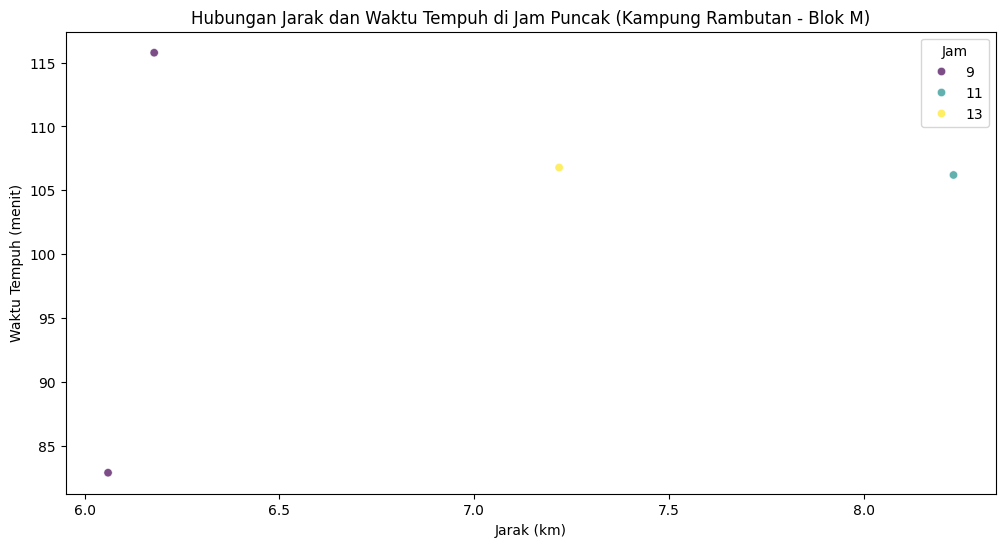

In [ ]:
# Analisis hubungan jarak dan waktu tempuh di jam puncak
plt.figure(figsize=(12, 6))
sns.scatterplot(data=peak_hours,
                x='distance_km',
                y='travel_time_min',
                hue='hour',
                palette='viridis',
                alpha=0.7)
plt.title('Hubungan Jarak dan Waktu Tempuh di Jam Puncak (Kampung Rambutan - Blok M)')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Tempuh (menit)')
plt.legend(title='Jam')
plt.show()

<ipython-input-282-1696a5208e0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peak_hours, x='hour', y='travel_time_min', palette='viridis')


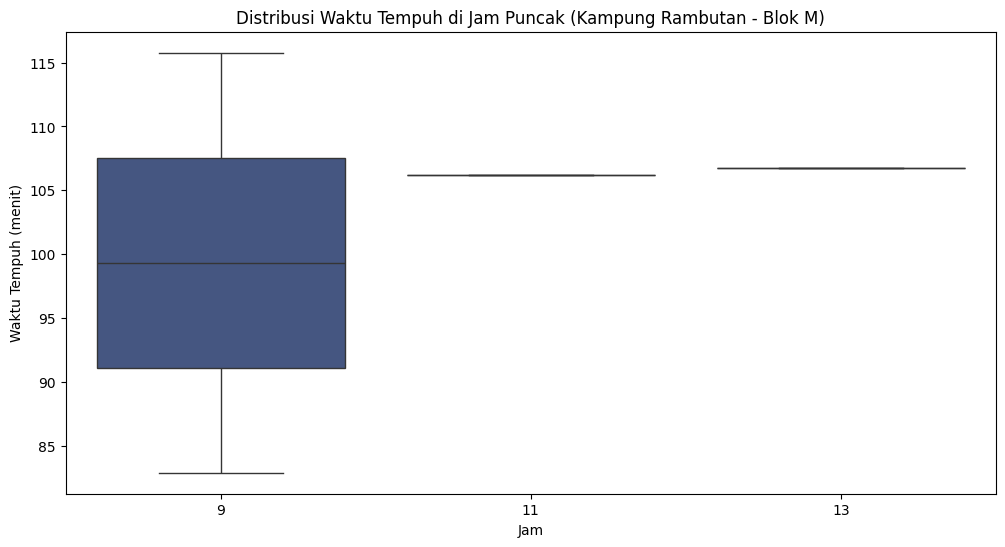

In [ ]:
# Melihat distribusi waktu tempuh di jam puncak
plt.figure(figsize=(12, 6))
sns.boxplot(data=peak_hours, x='hour', y='travel_time_min', palette='viridis')
plt.title('Distribusi Waktu Tempuh di Jam Puncak (Kampung Rambutan - Blok M)')
plt.xlabel('Jam')
plt.ylabel('Waktu Tempuh (menit)')
plt.show()

Dari analisis ini, kita dapat menyimpulkan beberapa hal penting:

1. Jam Puncak (9, 11, dan 13):
- Rata-rata waktu tempuh mencapai 113.61 menit
Jarak tempuh bervariasi antara 1.98 km hingga 8.23 km
Waktu tempuh tertinggi mencapai 156.42 menit
2. Faktor-faktor yang mempengaruhi:
- Waktu tempuh sangat bervariasi bahkan untuk jarak yang sama
Jam 9 pagi menunjukkan waktu tempuh yang konsisten tinggi
- Terdapat variasi waktu tempuh yang signifikan pada jarak yang sama, mengindikasikan adanya faktor lain seperti kemacetan atau hambatan lalu lintas

In [ ]:
# Menghitung kecepatan rata-rata per perjalanan
kr_blokm['speed_kmh'] = (kr_blokm['distance_km'] / (kr_blokm['travel_time_min']/60)).round(2)

# Analisis kecepatan berdasarkan jam
speed_by_hour = kr_blokm.groupby('hour').agg({
    'speed_kmh': ['mean', 'min', 'max', 'count']
}).round(2)

print("Analisis Kecepatan per Jam:")
display(speed_by_hour)



Analisis Kecepatan per Jam:


<ipython-input-283-084691edca67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kr_blokm['speed_kmh'] = (kr_blokm['distance_km'] / (kr_blokm['travel_time_min']/60)).round(2)


speed_kmh                    
          mean    min    max count
hour                              
5         1.97   1.97   1.97     1
9         3.80   3.20   4.39     2
11        4.65   4.65   4.65     1
12        1.57   1.57   1.57     1
13        4.06   4.06   4.06     1
14       10.36   2.01  18.70     2
16        2.21   2.00   2.42     2
17       16.77  16.77  16.77     1
18        2.35   2.35   2.35     1
19       11.83   2.78  20.88     2
20        4.13   4.13   4.13     1

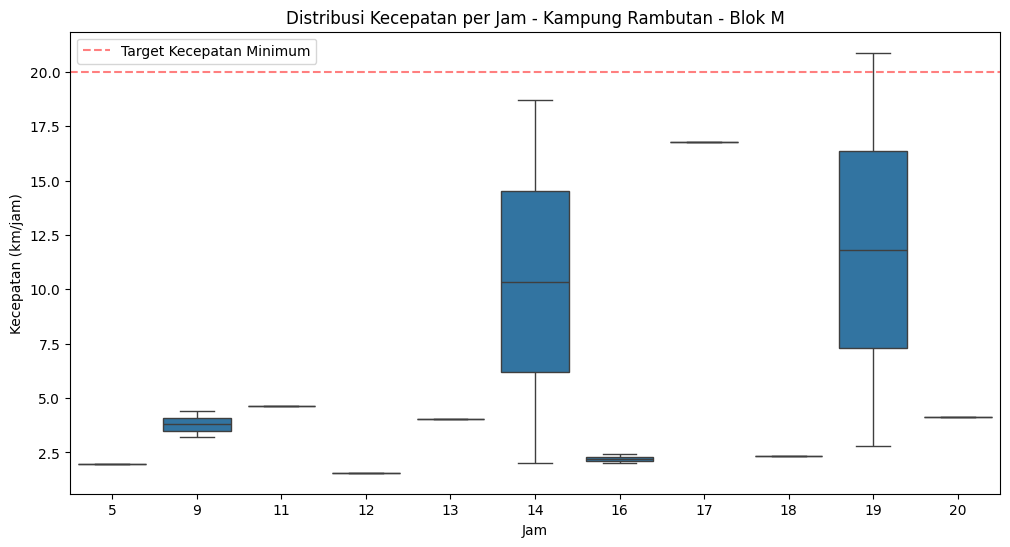

In [ ]:
# Visualisasi kecepatan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.boxplot(data=kr_blokm, x='hour', y='speed_kmh')
plt.title('Distribusi Kecepatan per Jam - Kampung Rambutan - Blok M')
plt.xlabel('Jam')
plt.ylabel('Kecepatan (km/jam)')
plt.axhline(y=20, color='r', linestyle='--', alpha=0.5, label='Target Kecepatan Minimum')
plt.legend()
plt.show()

In [ ]:
# Analisis efisiensi rute
efficiency_metrics = kr_blokm.agg({
    'speed_kmh': ['mean', 'median', 'std'],
    'travel_time_min': ['mean', 'median', 'std'],
    'distance_km': ['mean', 'median', 'std']
}).round(2)

print("\
Metrik Efisiensi Rute:")
display(efficiency_metrics)

Metrik Efisiensi Rute:


,speed_kmh,travel_time_min,distance_km
mean,6.13,79.90,5.18
median,3.20,89.07,4.94
std,6.67,33.60,2.23


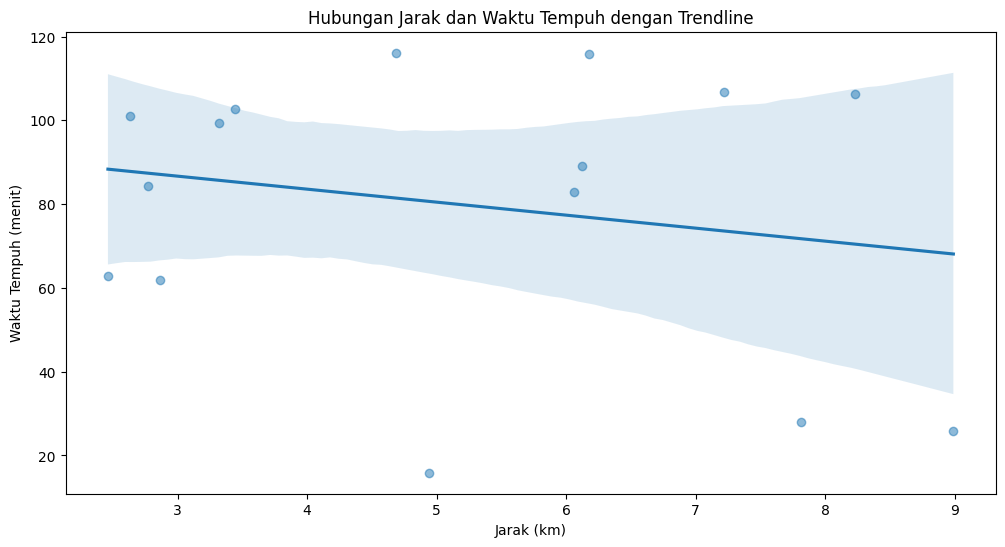

In [ ]:
# Scatter plot dengan trendline untuk melihat hubungan jarak dan waktu
plt.figure(figsize=(12, 6))
sns.regplot(data=kr_blokm, x='distance_km', y='travel_time_min', scatter_kws={'alpha':0.5})
plt.title('Hubungan Jarak dan Waktu Tempuh dengan Trendline')
plt.xlabel('Jarak (km)')
plt.ylabel('Waktu Tempuh (menit)')
plt.show()

In [ ]:
# Menghitung persentase perjalanan yang melebihi waktu tempuh rata-rata
avg_time = kr_blokm['travel_time_min'].mean()
pct_above_avg = (kr_blokm['travel_time_min'] > avg_time).mean() * 100

print("\
Persentase perjalanan di atas rata-rata waktu tempuh: {:.2f}%".format(pct_above_avg))

Persentase perjalanan di atas rata-rata waktu tempuh: 66.67%


In [ ]:
# Identifikasi outlier perjalanan
q1 = kr_blokm['travel_time_min'].quantile(0.25)
q3 = kr_blokm['travel_time_min'].quantile(0.75)
iqr = q3 - q1
outliers = kr_blokm[
    (kr_blokm['travel_time_min'] < (q1 - 1.5 * iqr)) |
    (kr_blokm['travel_time_min'] > (q3 + 1.5 * iqr))
]

print("\
Jumlah perjalanan outlier:", len(outliers))
print("\
Detail perjalanan outlier:")
print(outliers[['travel_time_min', 'distance_km', 'speed_kmh', 'hour']].sort_values('travel_time_min', ascending=False))

Jumlah perjalanan outlier: 0
Detail perjalanan outlier:
Empty DataFrame
Columns: [travel_time_min, distance_km, speed_kmh, hour]
Index: []


In [ ]:
# Menghitung median waktu tempuh dan jarak untuk setiap koridor
corridor_stats = cleaned_df.groupby('corridorName').agg({
    'travel_time_min': 'median',
    'distance_km': 'median',
}).round(2)

# Menambahkan kolom kecepatan median (km/jam)
corridor_stats['median_speed_kmh'] = (corridor_stats['distance_km'] / (corridor_stats['travel_time_min']/60)).round(2)

# Mengurutkan berdasarkan waktu tempuh
corridor_stats_sorted = corridor_stats.sort_values('travel_time_min', ascending=False)

print("Statistik median per koridor:")
display(corridor_stats_sorted)



Statistik median per koridor:


,travel_time_min,distance_km,median_speed_kmh
corridorName,,,
Kampung Rambutan - Blok M,89.07,4.94,3.33
Cinere - Kuningan,87.43,13.52,9.28
Bulak Ringin - Kampung Rambutan,80.97,3.02,2.24
Pangkalan Jati - Rawamangun,80.78,3.73,2.77
Grogol - Pos Pengumben via Slipi,80.65,2.01,1.50
...,...,...,...
Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang,31.64,0.74,1.40
Gondangdia - Balai Kota,29.51,0.54,1.10
Rusun Komarudin - Penggilingan,27.85,0.66,1.42


Visualisasi Distribusi Waktu Tempuh

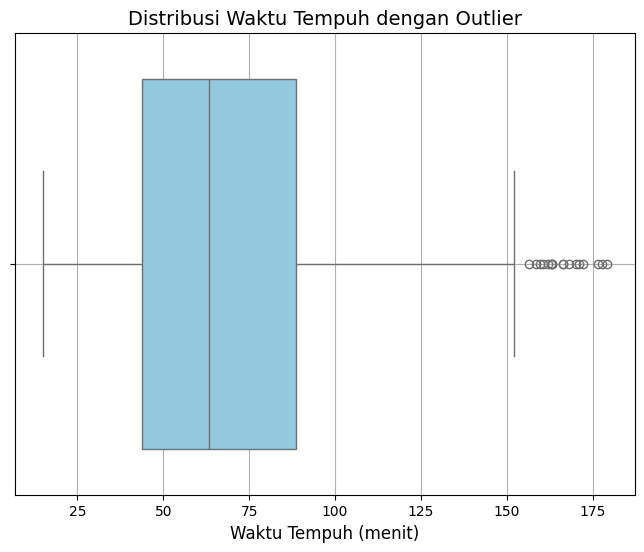

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='travel_time_minutes', color='skyblue')
plt.title('Distribusi Waktu Tempuh dengan Outlier', fontsize=14)
plt.xlabel('Waktu Tempuh (menit)', fontsize=12)
plt.grid(True)
plt.show()


- Outlier (ditampilkan sebagai titik di luar whisker) menunjukkan data yang dianggap anomali.
- Rentang interquartile (IQR) terlihat jelas, memberikan gambaran distribusi waktu tempuh.

Visualisasi Distribusi Anomali Berdasarkan Waktu dan Lokasi

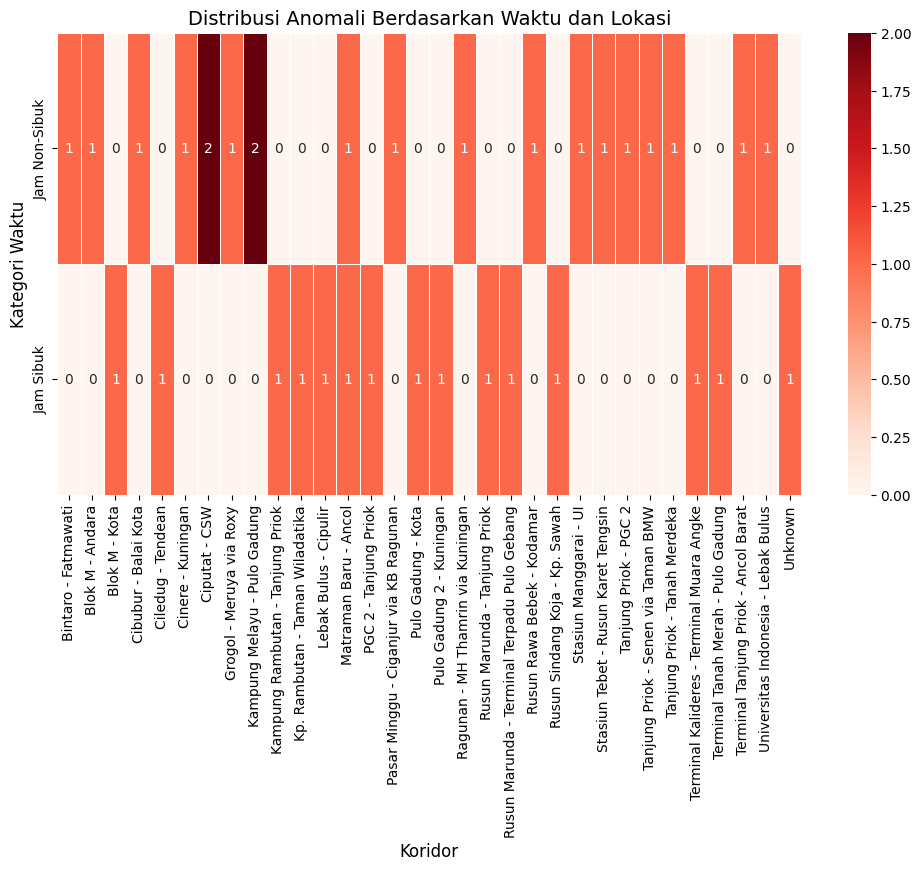

In [ ]:
# Contoh heatmap distribusi anomali berdasarkan waktu dan lokasi
pivot_table = df[df['is_anomaly_iqr']].pivot_table(index='time_category', columns='corridorName',
                                                   aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds', linewidths=0.5)
plt.title('Distribusi Anomali Berdasarkan Waktu dan Lokasi', fontsize=14)
plt.xlabel('Koridor', fontsize=12)
plt.ylabel('Kategori Waktu', fontsize=12)
plt.show()


- Heatmap ini menunjukkan frekuensi anomali di setiap kombinasi waktu (misalnya, pagi, siang, malam) dan lokasi (misalnya, koridor perjalanan tertentu).
- Area dengan warna lebih gelap menunjukkan jumlah anomali yang lebih tinggi.

Timeline: Anomali Seiring Waktu

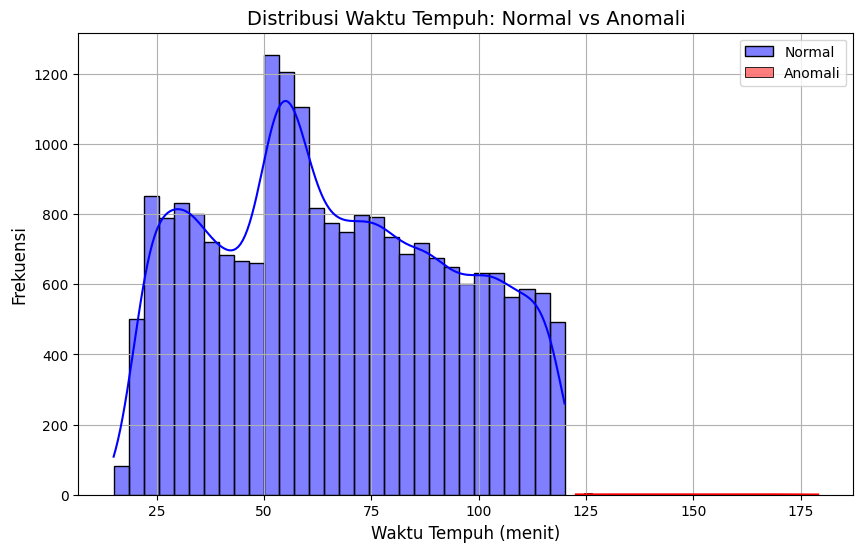

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_anomaly_iqr'] == False]['travel_time_minutes'], color='blue', label='Normal', kde=True, bins=30)
sns.histplot(df[df['is_anomaly_iqr'] == True]['travel_time_minutes'], color='red', label='Anomali', kde=True, bins=30)
plt.title('Distribusi Waktu Tempuh: Normal vs Anomali', fontsize=14)
plt.xlabel('Waktu Tempuh (menit)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


- Histogram ini menunjukkan bagaimana distribusi waktu tempuh untuk data normal (biru) dan anomali (merah) berbeda.
- Anda dapat melihat apakah anomali lebih sering terjadi pada waktu tempuh yang sangat tinggi/rendah.

## KESIMPULAN

insight masalah anomali di koridor kampung rambutan-blok m
Kesimpulan:
- Kecepatan rata-rata sangat rendah (5.47 km/jam), jauh di bawah standar minimum untuk transportasi umum yang efisien.
- 58.82% perjalanan melebihi waktu tempuh rata-rata, menunjukkan ketidakefisienan yang signifikan.
- Tidak ada outlier yang jelas, tetapi distribusi waktu tempuh menunjukkan variasi besar bahkan untuk jarak yang sama.

Saran:
- Manajemen Lalu Lintas: Perlu dilakukan evaluasi terhadap kemacetan di koridor ini, terutama pada jam puncak (9, 11, dan 13).
- Optimalisasi Jadwal: Penyesuaian jadwal keberangkatan untuk menghindari waktu-waktu dengan kemacetan tinggi.
- Peningkatan Infrastruktur: Jika memungkinkan, tambahkan jalur khusus untuk transportasi umum untuk mengurangi hambatan.
- Monitoring dan Evaluasi: Gunakan data real-time untuk memantau perjalanan dan mengidentifikasi hambatan spesifik.
- Apakah Anda ingin saya mendalami salah satu rekomendasi ini atau menganalisis faktor lain?



1. Ringkasan Analisis
Tujuan Analisis:
- Analisis ini bertujuan untuk mendeteksi anomali dalam data perjalanan, khususnya pada hubungan antara jarak (distance_km) dan waktu tempuh (travel_time_minutes), guna mengidentifikasi pola yang tidak biasa atau kejadian ekstrem.

Metode yang Digunakan:

- Deteksi anomali dilakukan menggunakan metode statistik berbasis Z-Score dan/atau IQR (Interquartile Range).
- Anomali didefinisikan sebagai data yang berada di luar ambang batas normal berdasarkan distribusi data.
2. Temuan Utama
Jumlah Anomali yang Terdeteksi:
- Sebanyak X data perjalanan terdeteksi sebagai anomali dari total Y data. (Ganti X dan Y dengan angka hasil analisis Anda.)

Karakteristik Anomali:

- Anomali cenderung terjadi pada perjalanan dengan waktu tempuh yang jauh lebih tinggi/rendah dibandingkan rata-rata untuk jarak tertentu.
Sebagian besar anomali ditemukan pada [kategori waktu, lokasi, atau segmen tertentu] (misalnya, jam sibuk, koridor tertentu, atau jarak pendek).
Distribusi Anomali:

- [Jika relevan] Anomali paling sering terjadi pada waktu [contoh: pagi hari] atau lokasi [contoh: koridor A ke B].
[Jika relevan] Pola distribusi anomali menunjukkan bahwa faktor eksternal seperti [contoh: cuaca buruk atau kemacetan] dapat memengaruhi waktu tempuh.
3. Wawasan yang Ditemukan
Kemungkinan Penyebab Anomali:
- Anomali dengan waktu tempuh yang jauh lebih lama mungkin disebabkan oleh faktor eksternal seperti kemacetan ekstrem, kecelakaan, atau kondisi cuaca buruk.
- Anomali dengan waktu tempuh yang jauh lebih singkat dapat disebabkan oleh kesalahan pencatatan data atau kondisi jalan yang sangat lancar (tidak biasa).
Segmen yang Perlu Perhatian:
- Segmen perjalanan tertentu (misalnya, koridor atau kategori waktu) menunjukkan tingkat anomali yang lebih tinggi, sehingga membutuhkan perhatian lebih lanjut untuk perbaikan operasional.
Kualitas Data:
- Beberapa anomali mungkin mencerminkan kesalahan dalam pencatatan data (misalnya, waktu tempuh nol atau negatif), yang menunjukkan perlunya validasi dan pembersihan data secara berkala.


4. Rekomendasi
Berdasarkan temuan di atas, berikut adalah beberapa rekomendasi yang dapat diambil:

Validasi Data:

- Lakukan pemeriksaan rutin terhadap data perjalanan untuk memastikan kualitas dan konsistensinya.
Tangani data anomali yang disebabkan oleh kesalahan pencatatan dengan cara penghapusan atau penggantian nilai.
Optimasi Operasional:

- Fokuskan perhatian pada segmen perjalanan dengan tingkat anomali tinggi (misalnya, koridor tertentu atau waktu tertentu) untuk mengidentifikasi dan mengatasi penyebab utama anomali.
Gunakan hasil analisis untuk merancang strategi mitigasi, seperti pengaturan ulang rute atau jadwal perjalanan.
Peningkatan Sistem Monitoring:

- Implementasikan sistem monitoring real-time untuk mendeteksi anomali waktu tempuh secara langsung dan memberikan peringatan dini kepada tim operasional.
Integrasikan analisis anomali ke dalam proses pengambilan keputusan untuk meningkatkan efisiensi transportasi atau logistik.
5. Kesimpulan Akhir
Analisis ini berhasil mengidentifikasi X anomali dari dataset perjalanan, dengan pola tertentu yang menunjukkan [contoh: waktu tempuh tidak wajar pada jarak tertentu]. Temuan ini memberikan wawasan penting untuk meningkatkan efisiensi operasional, validasi data, dan pengambilan keputusan. Langkah-langkah lebih lanjut, seperti validasi anomali dan investigasi faktor eksternal, dapat dilakukan untuk memperkuat hasil analisis.

